### Корректно на:
#### pandas 1.2.4
#### numpy 1.20.2
#### matplotlib 3.4.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import re

In [3]:
#   Загрузка таблиц
orders_placed = pd.read_csv('data/Placed orders.csv', header=0, sep=',')
orders_complete = pd.read_csv('data/Complete orders.csv', header=0, sep=',')
market_complete = pd.read_csv('data/Market complete orders.csv', header=0, sep=',')

In [4]:
#Данный блок разбивает входную таблицу на таблицы по дням.
day_order_complete = []
unique_date_complete = orders_complete['Дата'].unique()
for _ in unique_date_complete:
    day_order_complete.append(orders_complete.loc[orders_complete['Дата'] == _,:])

day_order_placed = []
unique_date_placed = orders_placed['Дата'].unique()
for _ in unique_date_placed:
    day_order_placed.append(orders_placed.loc[orders_placed['Дата'] == _,:])

#Проверяется совпадение уникальных дней в таблицах заявок и исполнений
if sorted(unique_date_complete) != sorted(unique_date_placed):
    print('Ошибка в индексации. Даты указанные в таблице завершенных ордеров не совпадают с таблицей выставленных')

In [5]:
#   Блок который я использовал в некоторых первых пунктах так как мне было удобнее таким образом "ориентироваться" во времени
#   Позже он станет бесполезным, однако я не захотел переписывать ранее сделанные пункты под новую реализацию

def small_normal_view(work_table_placed):
    for _ in range(work_table_placed.shape[0]):

        def time_parser(work_value):
            success_status = False
            if len(work_value) == 5:
                hour_ = work_value[:1]
                minute_ = work_value[1:3]
                sec_ = work_value[3:]
                success_status = True
            if len(work_value) == 6:
                hour_ = work_value[:2]
                minute_ = work_value[2:4]
                sec_ = work_value[4:]
                success_status = True
    #       Исключение связанное с возможностью некорректной даты
            if not success_status:
                print('Время в таблице указанно некорректно')
            return hour_, minute_, sec_

        work_value_ = str(work_table_placed.loc[_,'Время заявки'])
        hour, minute, sec = time_parser(work_value_)
        work_table_placed.loc[_, 'Час_открытие'] = hour
        work_table_placed.loc[_, 'Минута_открытие'] = minute
        work_table_placed.loc[_, 'Секунда_открытие'] = sec


        work_value_ = str(work_table_placed.loc[_,'Время снятия заявки'])
        hour, minute, sec = time_parser(work_value_)
        work_table_placed.loc[_, 'Час_снятие'] = hour
        work_table_placed.loc[_, 'Минута_снятие'] = minute
        work_table_placed.loc[_, 'Секунда_снятие'] = sec

work_table_placed = day_order_placed[0]
work_table_placed.reset_index(drop=True, inplace=True)

#Запуск
small_normal_view(work_table_placed)

/Users/molozey/Desktop/Forecsys/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/molozey/Desktop/Forecsys/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [6]:
unique_date_market = market_complete['Дата'].unique()
#   Можно понять что даты не совпадают между рынком и клиентами. Полагаю в таком случае нужно смотреть только на дни которые пересекаются
print(unique_date_market)
buffer = []
print(unique_date_complete)
for _ in unique_date_market:
    if unique_date_complete.__contains__(_):
        buffer.append(_)
day_order_complete_market = []
unique_date_market = buffer
for _ in unique_date_market:
    day_order_complete_market.append(market_complete.loc[market_complete['Дата'] == _,:])

[20180414 20180411 20180413 20180717 20180415 20180418 20180428 20180412]
[20180411 20180413 20180717 20180415 20180418 20180428 20180412]


# 1.1 Объем сделок рынка по инструменту

/Users/molozey/Desktop/Forecsys/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


DAY: 20180411
['jq1v', 'gAfLE34byRcu', 'N0ea', 'F9Tw', 'Kr1d', 'znKu', '7srkc', 'momz', 'GjgR', 'ETN9hjIEdlDW', 'Jnfh', 'UQEm31sDqlAg', 'aCiw', 'R8pBIopqatlp', 'jvNC', 'iCtXYnx8Ub8b', 't4yJZ', '1Dbr3T9Wpl3x']
[49885500.0, 33724.0, 92310000.0, 5589.0, 78148.0, 1030100.0, 1700000.0, 9600.0, 3900000.0, 3339.0, 20300.0, 1334.0, 41.0, 141.0, 50.0, 87.0, 15000.0, 16.0]
--------
DAY: 20180413
['jq1v', 'znKu', 'Kr1d', 'Jnfh', 'gAfLE34byRcu', 'aCiw', 'R8pBIopqatlp', 'F9Tw', 'N0ea', 'GjgR', 'ETN9hjIEdlDW', 'momz', 'iCtXYnx8Ub8b', 't4yJZ', '1Dbr3T9Wpl3x', '7srkc', 'jvNC', 'UQEm31sDqlAg', '0fRm7NyUxEdG']
[79865800.0, 1397100.0, 246899.0, 319100.0, 25583.0, 5732.0, 81.0, 4470.0, 31560000.0, 19010000.0, 26415.0, 5980.0, 278.0, 264000.0, 325.0, 440000.0, 20.0, 6414.0, 7.0]
--------
DAY: 20180717
['ETN9hjIEdlDW', 'jq1v', 'Kr1d', 'Jnfh', 'momz', 'N0ea', 'F9Tw', 'aCiw', 'jvNC', 'UQEm31sDqlAg', 'GjgR', 't4yJZ', 'R8pBIopqatlp', 'iCtXYnx8Ub8b', '7srkc', '0fRm7NyUxEdG', '6OBf0mwp3jLi']
[78128.0, 16392400.0,

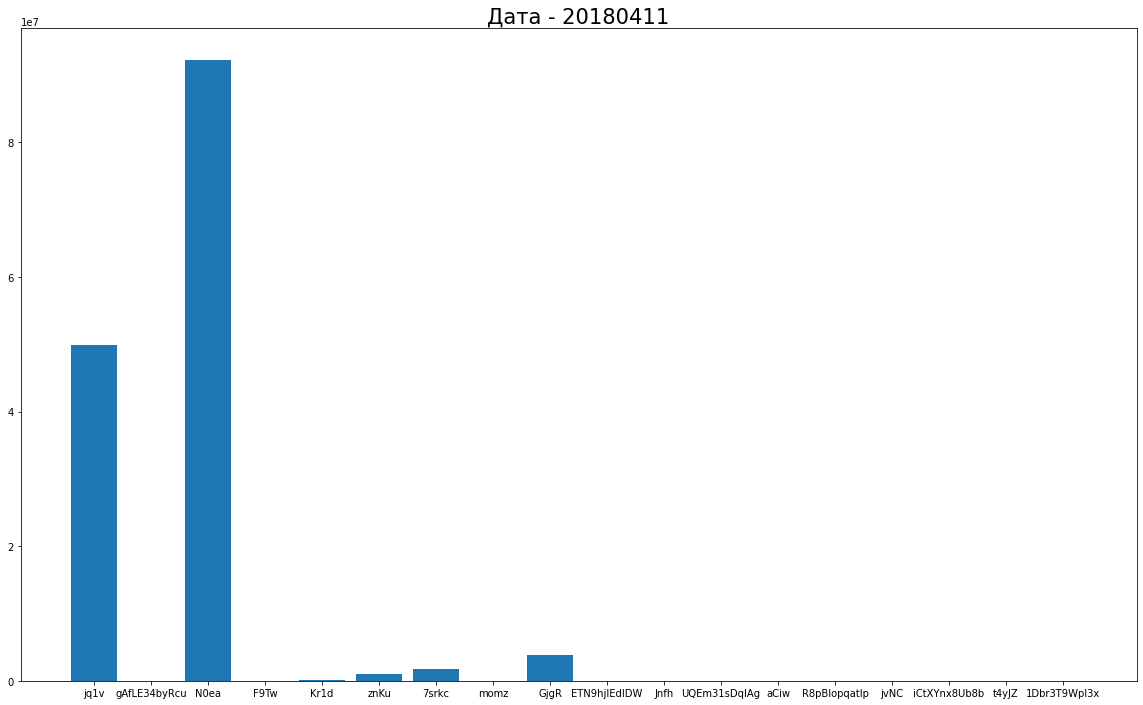

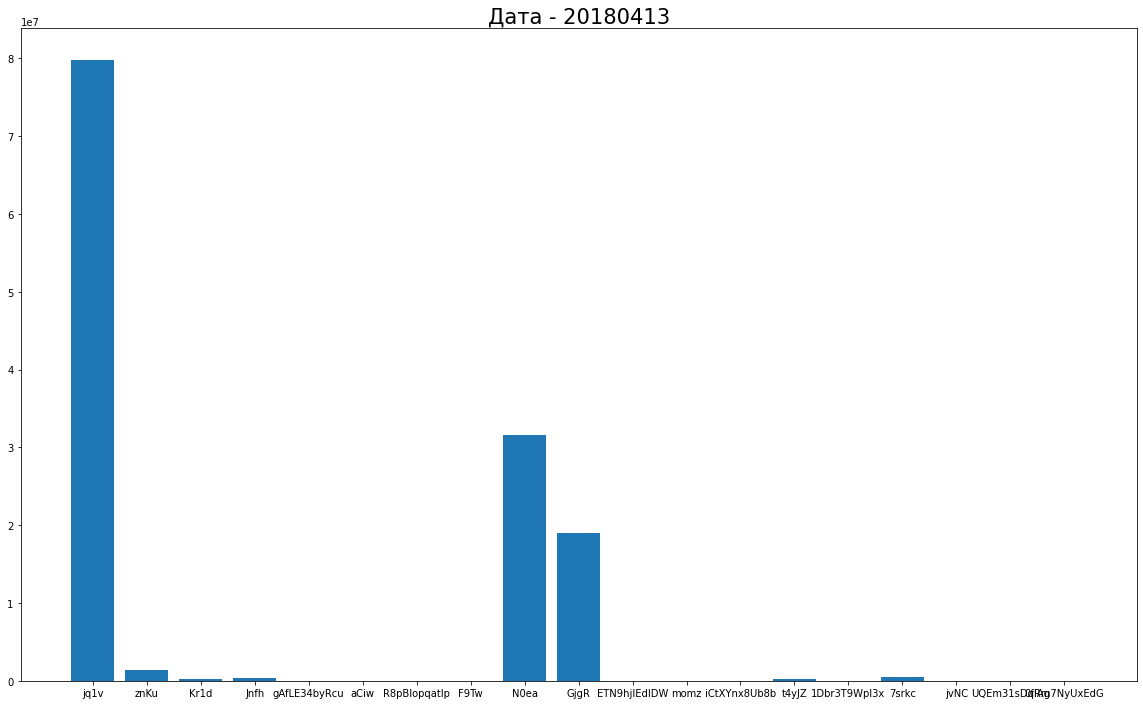

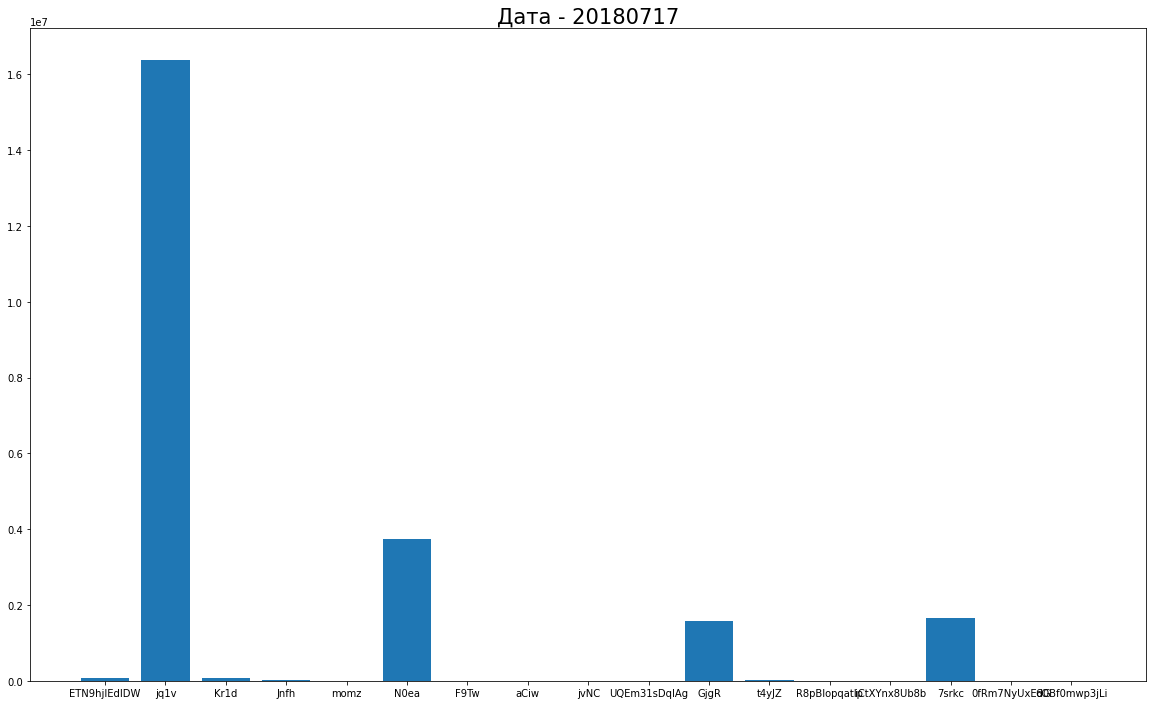

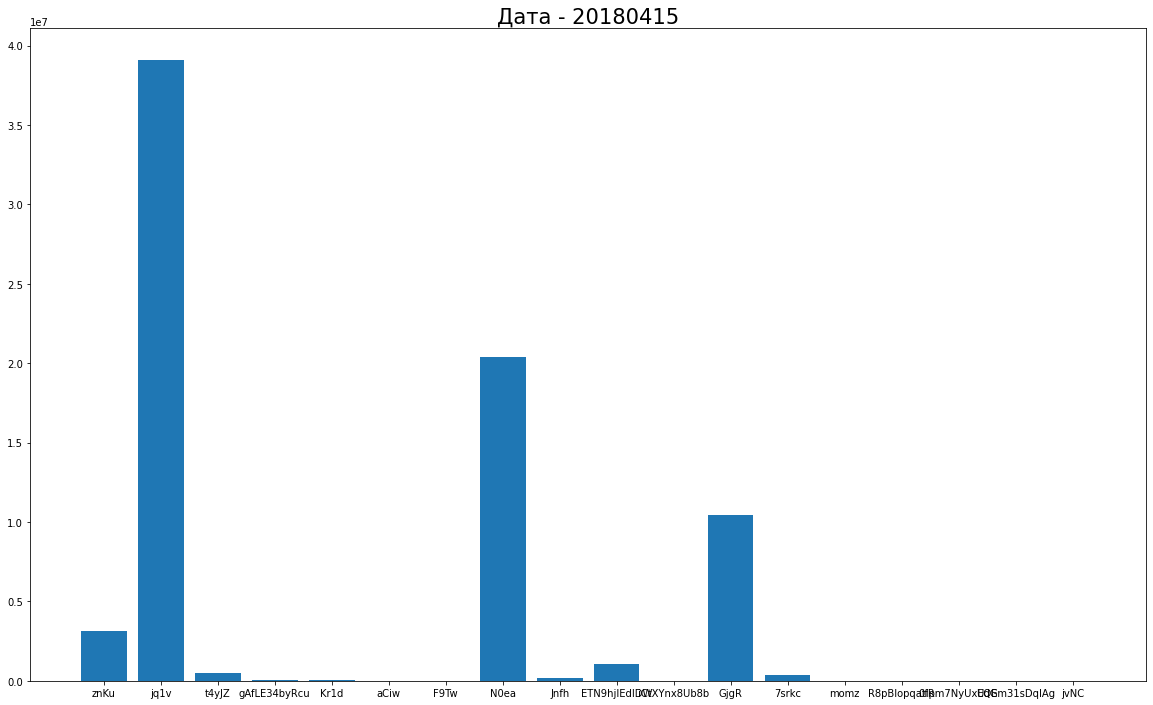

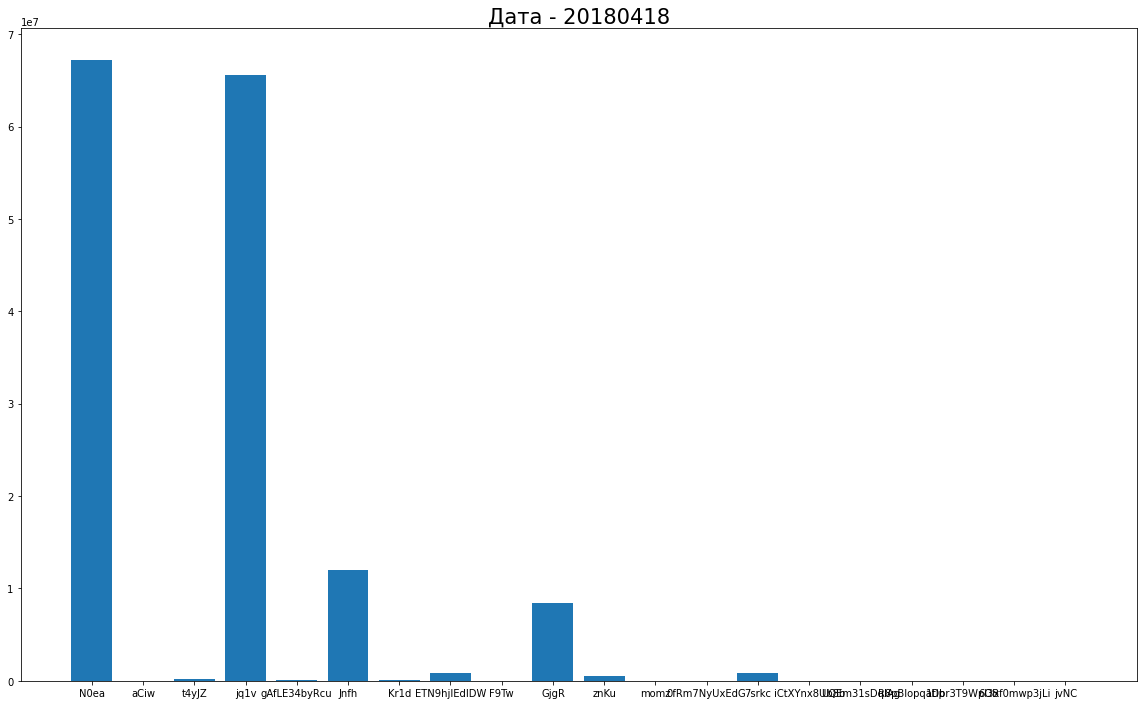

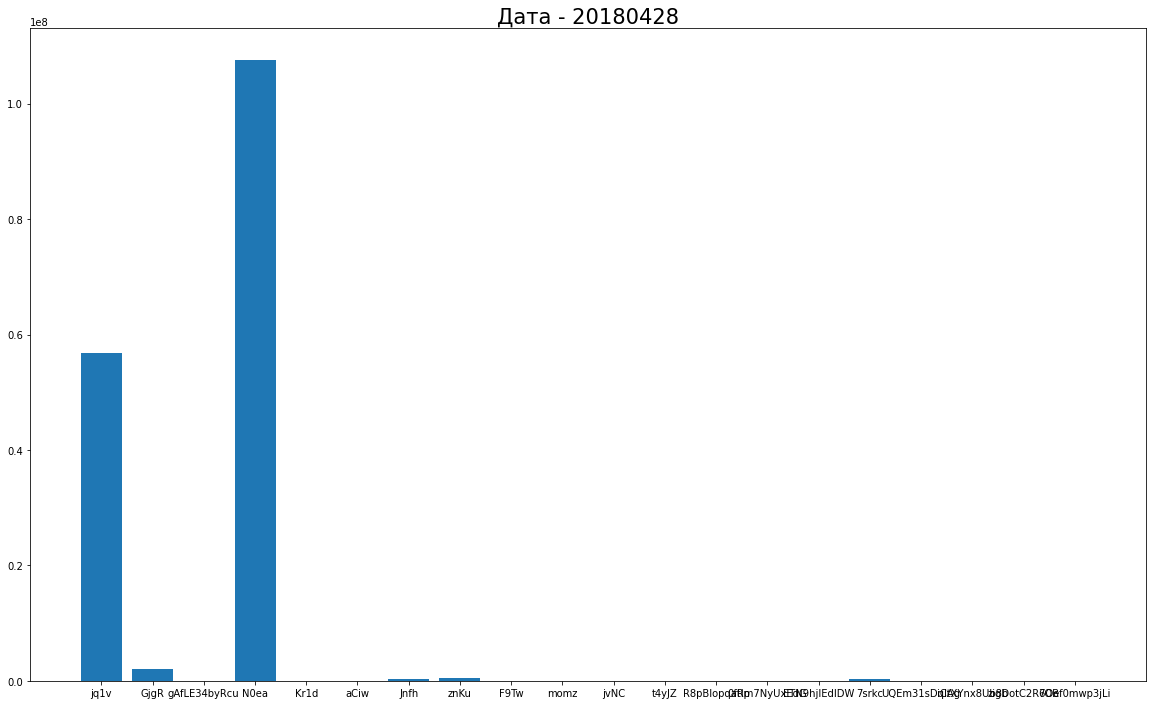

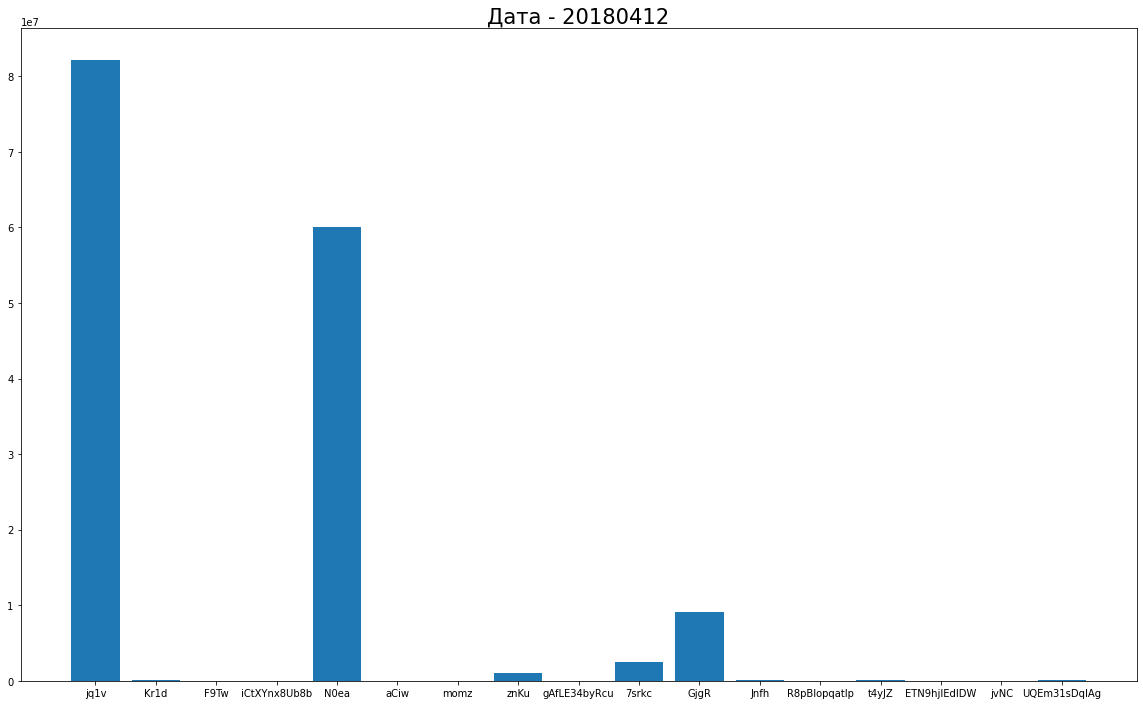

In [6]:
def volume_function(search_table):
    """
    Выдает гистограммы количества операций по каждому уникальному инструменту для каждого дня. Возможно так будет удобно видеть "популярность" инструментов
    :param search_table: Импорт таблицы
    :return:
    """
    days_array = []
    output_array = []
    for __ in search_table:
        market_day = __
        market_day.reset_index(drop=True, inplace=True)
        days_array.append(market_day.loc[0, 'Дата'])
        market_day_uniq_instruments = market_day['Инструмент'].unique()
        market_day_instruments = []
        for _ in market_day_uniq_instruments:
            market_day_instruments.append(market_day.loc[market_day['Инструмент'] == _,:])

        market_instrument_volume = []
        instrument_name = []
        for _ in market_day_instruments:
            instrument_buffer = _
            instrument_buffer.reset_index(drop=True, inplace=True)
# Далее нижний цикл for будет использоваться довольно часто, он вызван тем, что я решил никак не корректировать таблицы
# Данное преобразование убирает все лишнюю табуляцию а также меняет запятую на точку
            for i in range(instrument_buffer.shape[0]):
                instrument_buffer.loc[i, ' Объем'] = float(re.sub(r'[^0-9,]+', r'',str(instrument_buffer.loc[i, ' Объем'])).replace(',', '.'))
            market_instrument_volume.append(sum(instrument_buffer[' Объем']))
            instrument_name.append(instrument_buffer.loc[0, 'Инструмент'])


        plt.figure(figsize=(20,12))
        plt.bar(instrument_name, market_instrument_volume)
        output_array.append([instrument_name, market_instrument_volume])
        plt.title('Дата - ' + str(market_day.loc[1, 'Дата']), fontsize=21)
        print('DAY:', market_day.loc[1, 'Дата'])
        print(instrument_name)
        print(market_instrument_volume)
        print('--------')
        plt.show()
    return days_array, output_array
# Запуск
days11, results11 = volume_function(day_order_complete_market)

# 1.2 Объем сделок клиентов по инструменту

DAY: 20180411
['jq1v', 'gAfLE34byRcu', 'N0ea', '7srkc', 'F9Tw', 'znKu', 'Kr1d', 'momz', 'GjgR', 'ETN9hjIEdlDW', 'UQEm31sDqlAg', 'aCiw', 'R8pBIopqatlp', 'iCtXYnx8Ub8b', 'Jnfh', 't4yJZ', 'jvNC', '1Dbr3T9Wpl3x']
[9313900.0, 15802.0, 64460000.0, 1370000.0, 4390.0, 154800.0, 71166.0, 4520.0, 2260000.0, 1244.0, 245.0, 15.0, 121.0, 3.0, 3300.0, 10000.0, 10.0, 16.0]
--------
DAY: 20180413
['Kr1d', 'jq1v', 'F9Tw', 'GjgR', 'gAfLE34byRcu', 'momz', 'aCiw', 'znKu', 'Jnfh', 'N0ea', 'ETN9hjIEdlDW', '7srkc', '1Dbr3T9Wpl3x', 'jvNC', 'iCtXYnx8Ub8b', 't4yJZ', 'R8pBIopqatlp', 'UQEm31sDqlAg', '0fRm7NyUxEdG']
[245650.0, 16577200.0, 3364.0, 4540000.0, 4507.0, 4040.0, 1989.0, 250400.0, 102300.0, 10090000.0, 16711.0, 80000.0, 324.0, 10.0, 165.0, 54000.0, 12.0, 5800.0, 6.0]
--------
DAY: 20180717
['jq1v', 'GjgR', 'Kr1d', 'momz', 'N0ea', 'F9Tw', 'ETN9hjIEdlDW', 'jvNC', 'aCiw', 'Jnfh', 'UQEm31sDqlAg', '0fRm7NyUxEdG', '7srkc', 't4yJZ', 'R8pBIopqatlp']
[2920700.0, 570000.0, 55186.0, 780.0, 970000.0, 6549.0, 17176.0

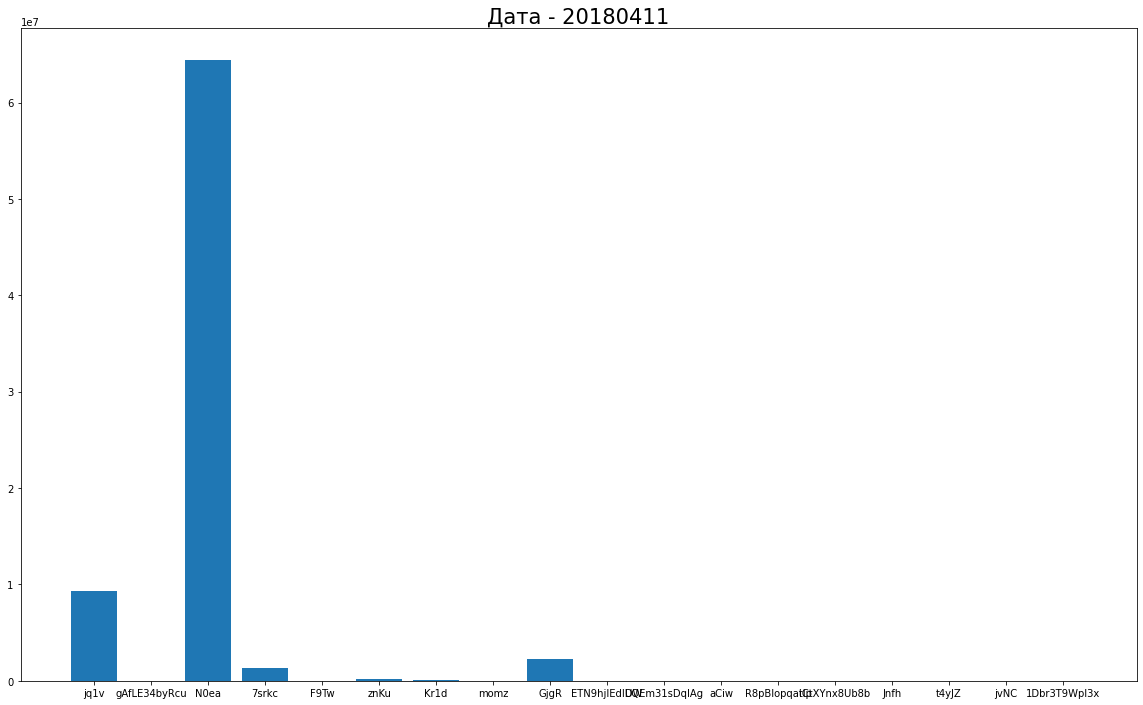

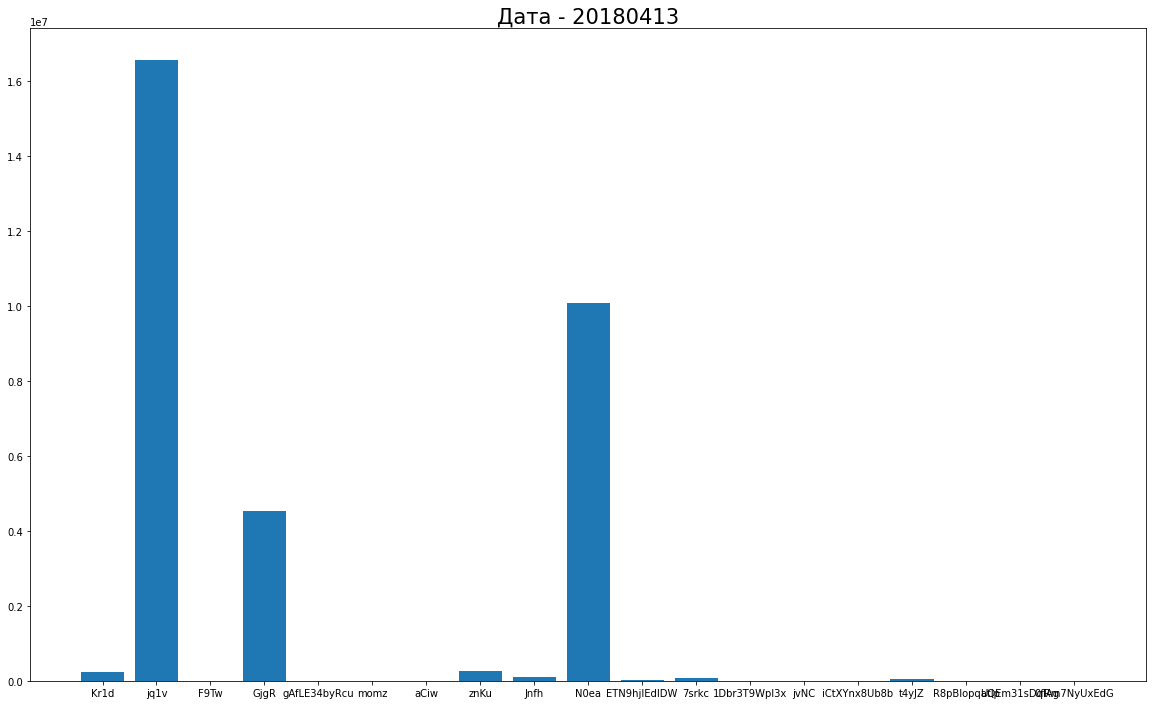

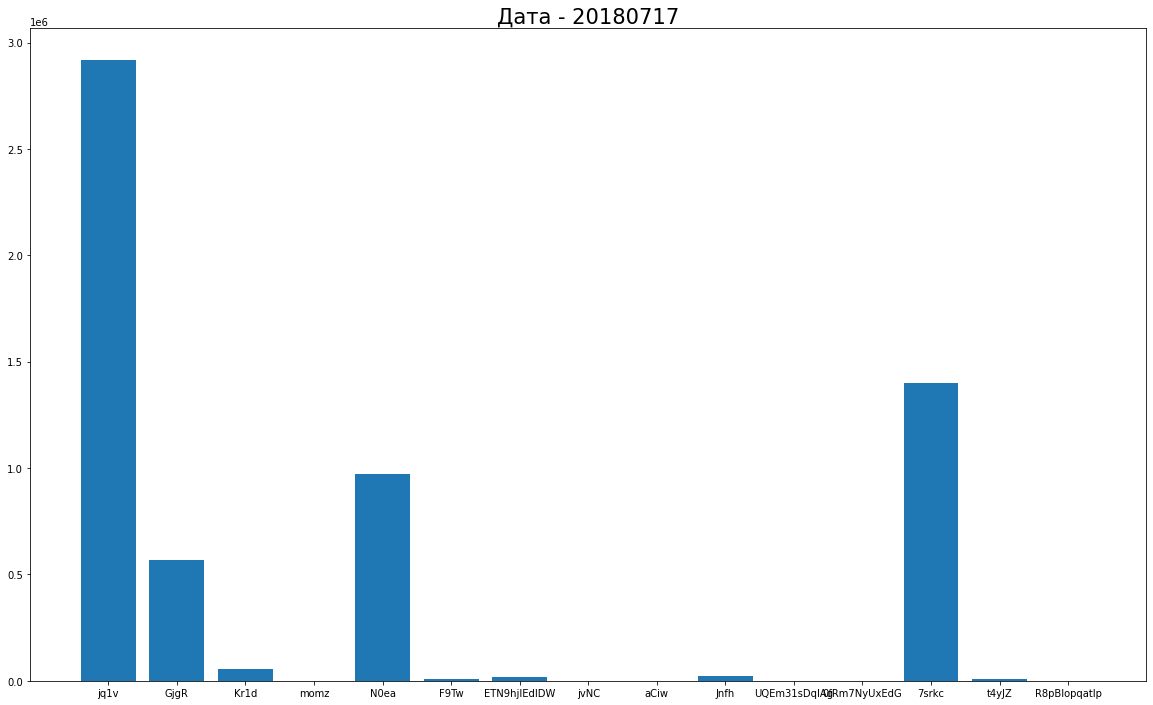

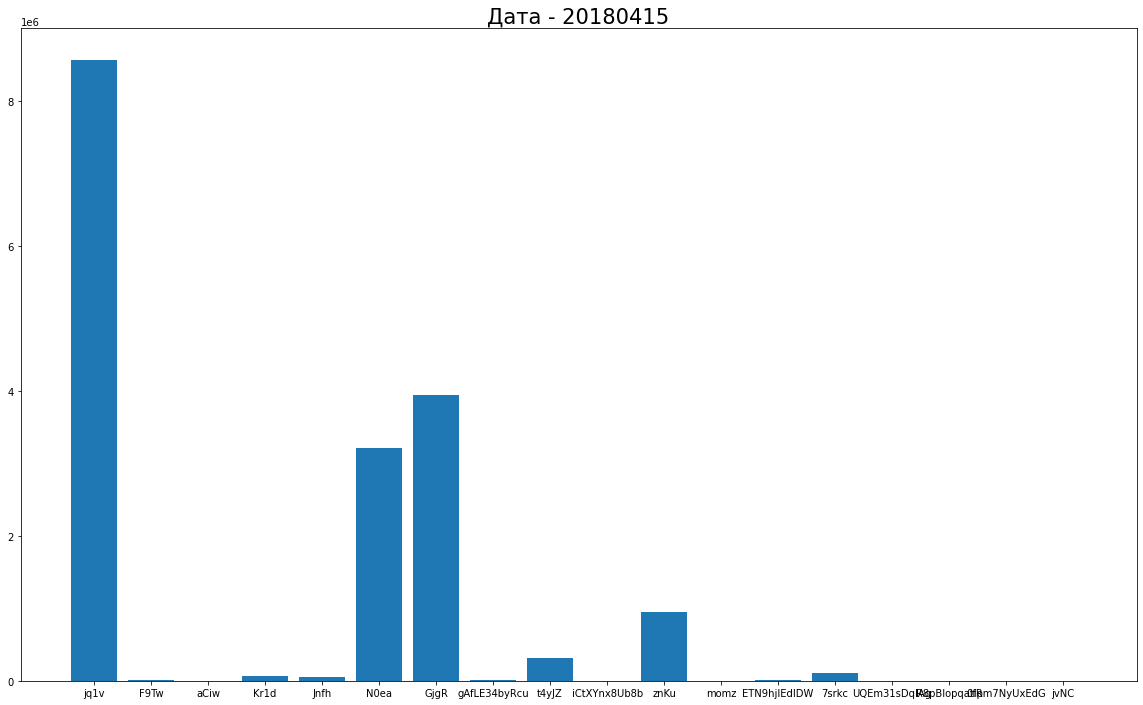

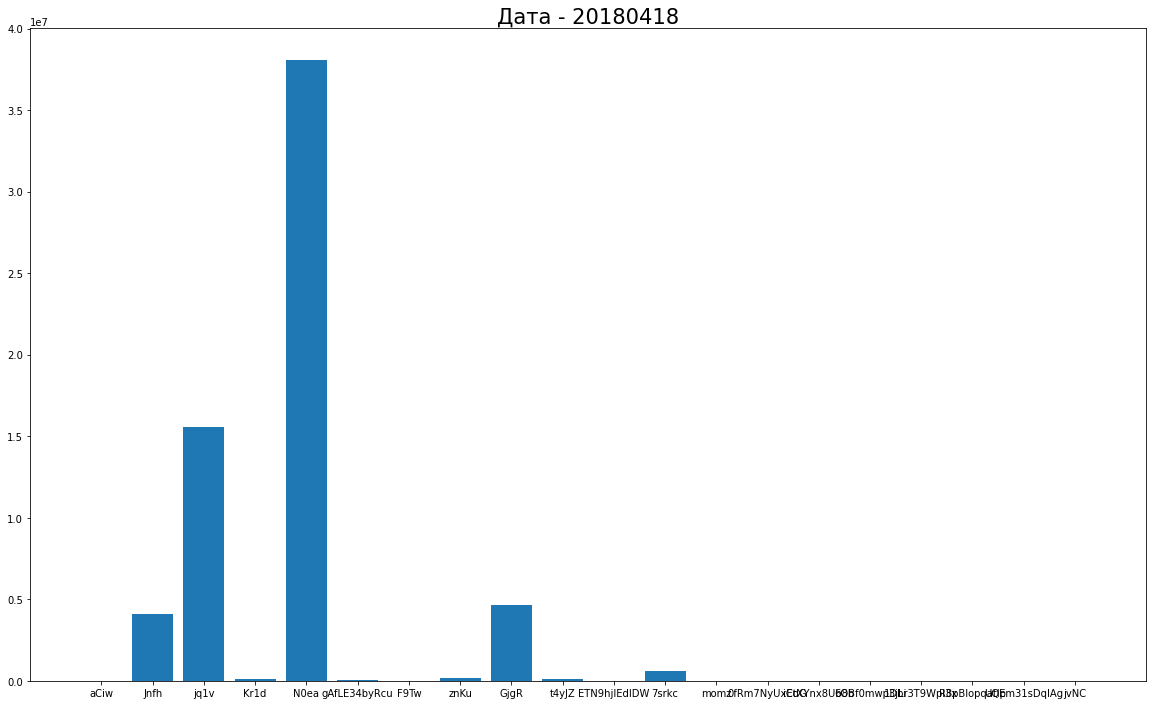

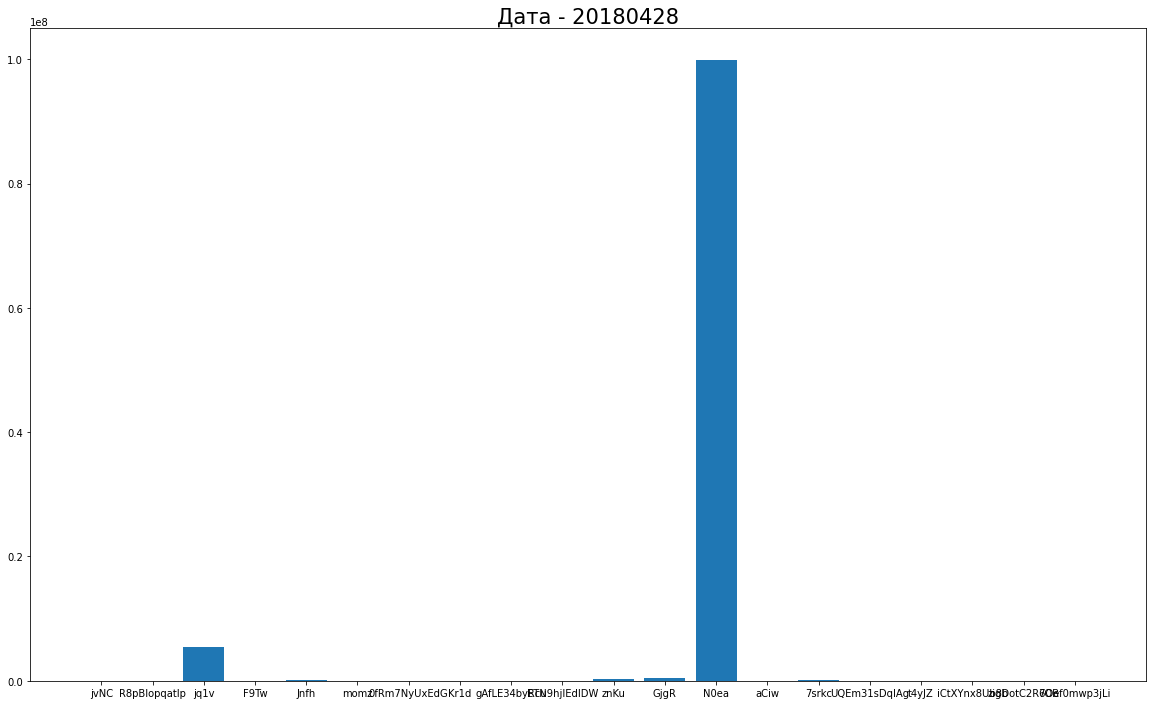

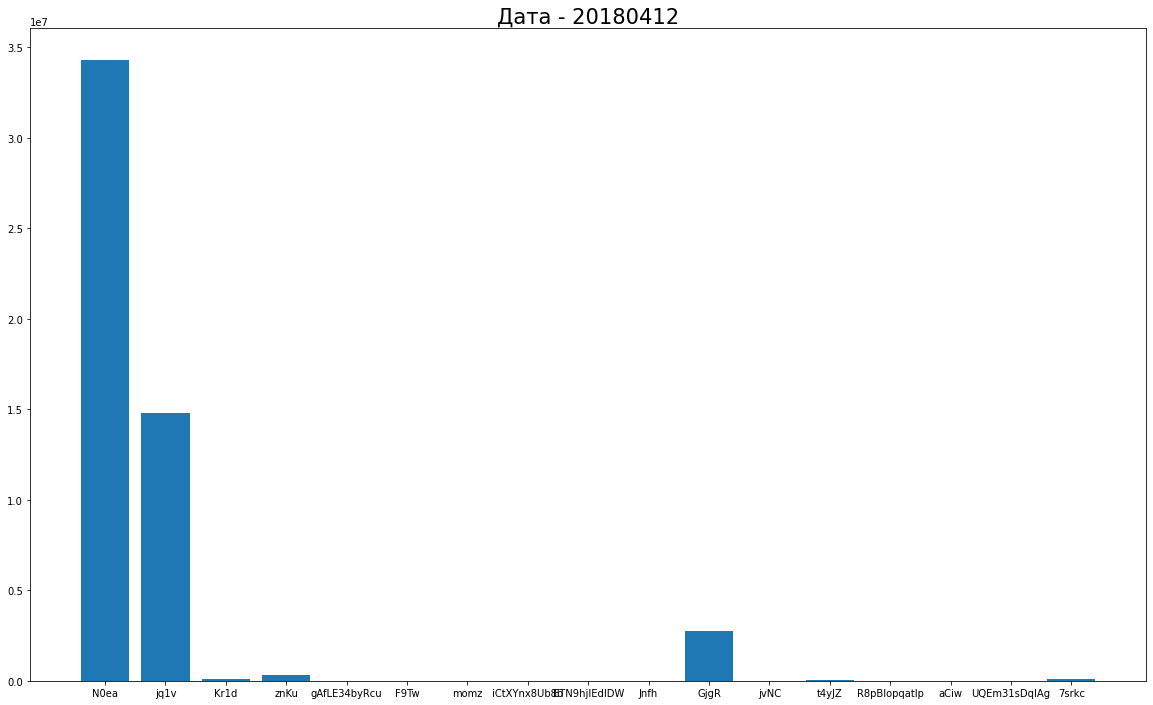

In [7]:
# Отличие от прошлого пункта в том, что передается таблиц по клиентам
# Запуск
days12, results12 = volume_function(day_order_complete)

# 1.3 Средневзвешенная цена по инструменту

DAY: 20180411
['jq1v', 'gAfLE34byRcu', 'N0ea', 'F9Tw', 'Kr1d', 'znKu', '7srkc', 'momz', 'GjgR', 'ETN9hjIEdlDW', 'Jnfh', 'UQEm31sDqlAg', 'aCiw', 'R8pBIopqatlp', 'jvNC', 'iCtXYnx8Ub8b', 't4yJZ', '1Dbr3T9Wpl3x']
[40.00480493329725, 928.2983780097261, 0.053303634492471025, 1171.2258185721969, 99.71809707222198, 1.5393411319289374, 0.34455, 73.1140625, 0.291225641025641, 1068.1495896975143, 6.532019704433497, 1185.2818590704649, 1423.780487804878, 1544.336808510638, 132.6, 1037.5505747126438, 7.041, 1292.0]
--------
DAY: 20180413
['jq1v', 'znKu', 'Kr1d', 'Jnfh', 'gAfLE34byRcu', 'aCiw', 'R8pBIopqatlp', 'F9Tw', 'N0ea', 'GjgR', 'ETN9hjIEdlDW', 'momz', 'iCtXYnx8Ub8b', 't4yJZ', '1Dbr3T9Wpl3x', '7srkc', 'jvNC', 'UQEm31sDqlAg', '0fRm7NyUxEdG']
[39.94756624863208, 1.5214444921623376, 101.58057869817212, 6.766775305546851, 947.4927139115819, 1851.92864619679, 1545.6235802469134, 1168.3770693512308, 0.05342799429657795, 0.28028563913729615, 1075.9308472458822, 71.91923076923077, 1041.4848920863308, 7

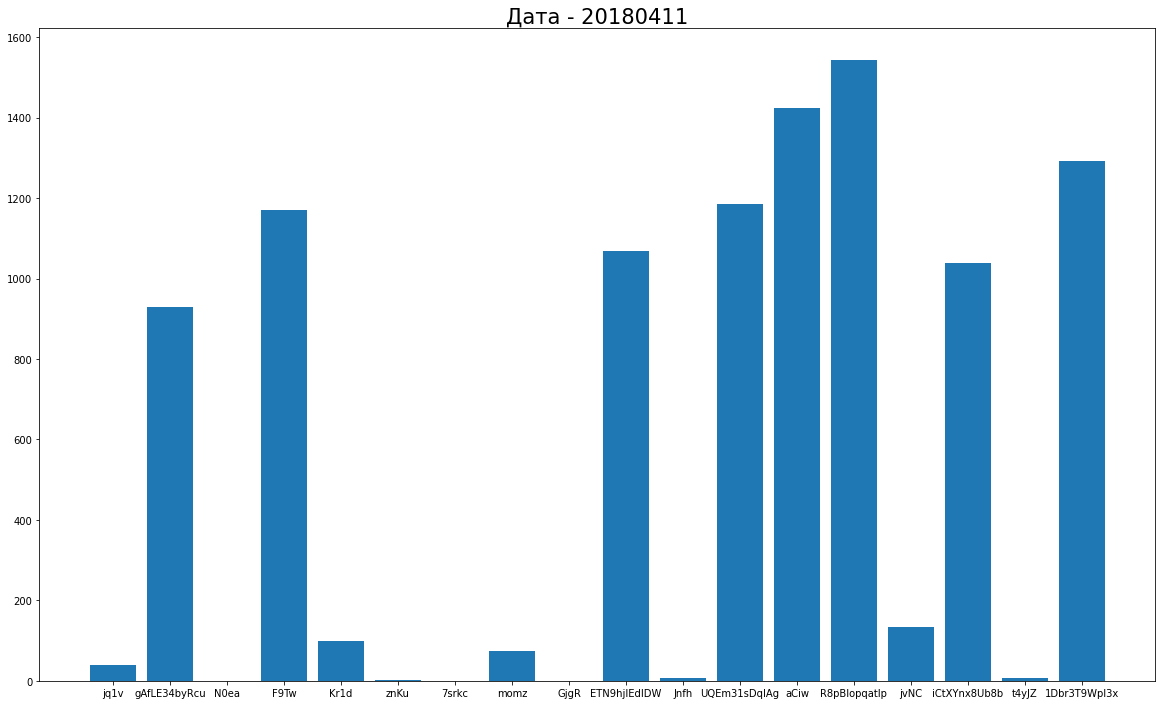

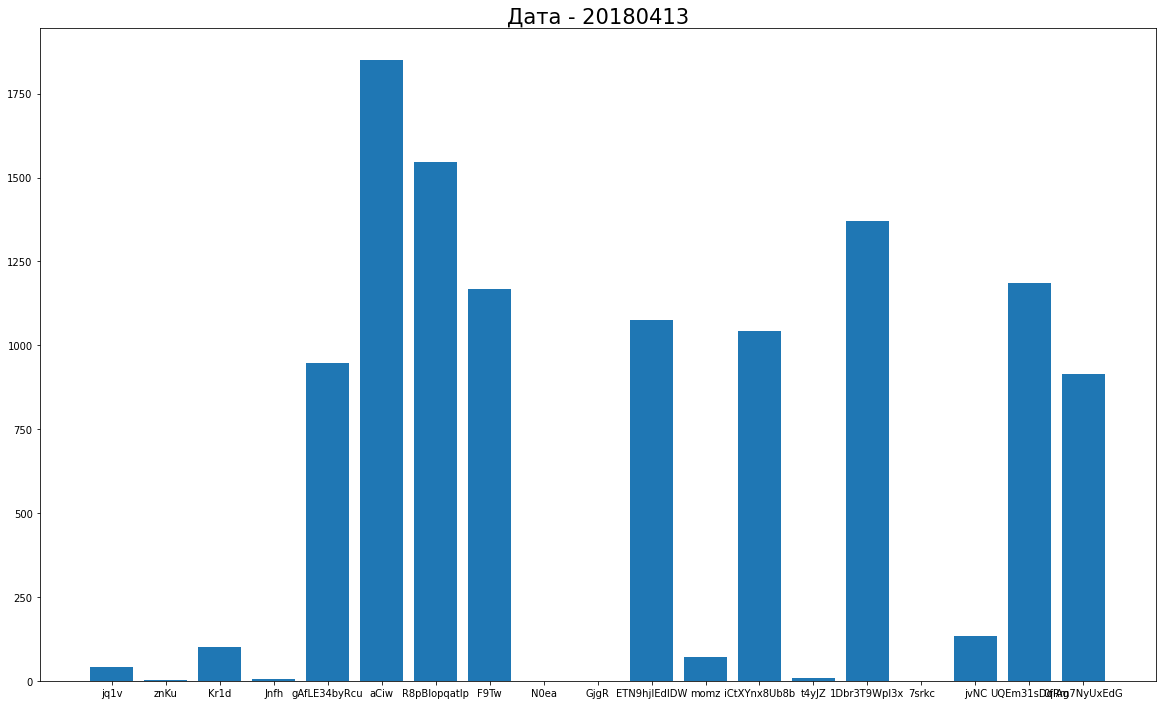

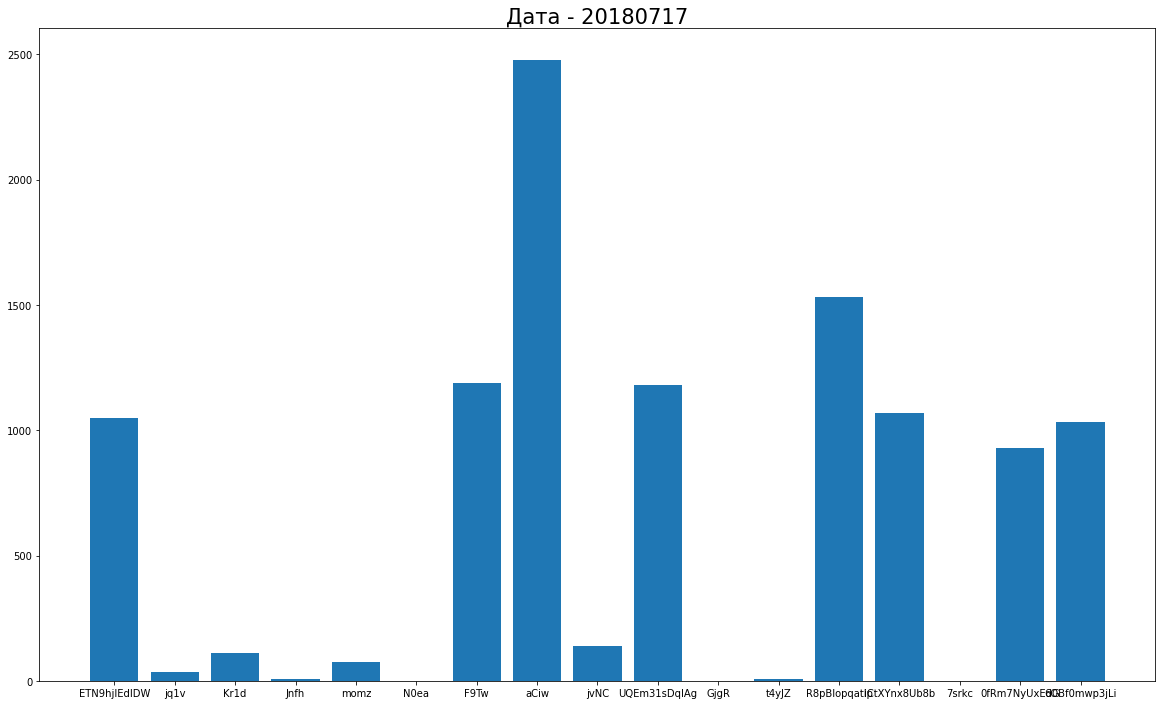

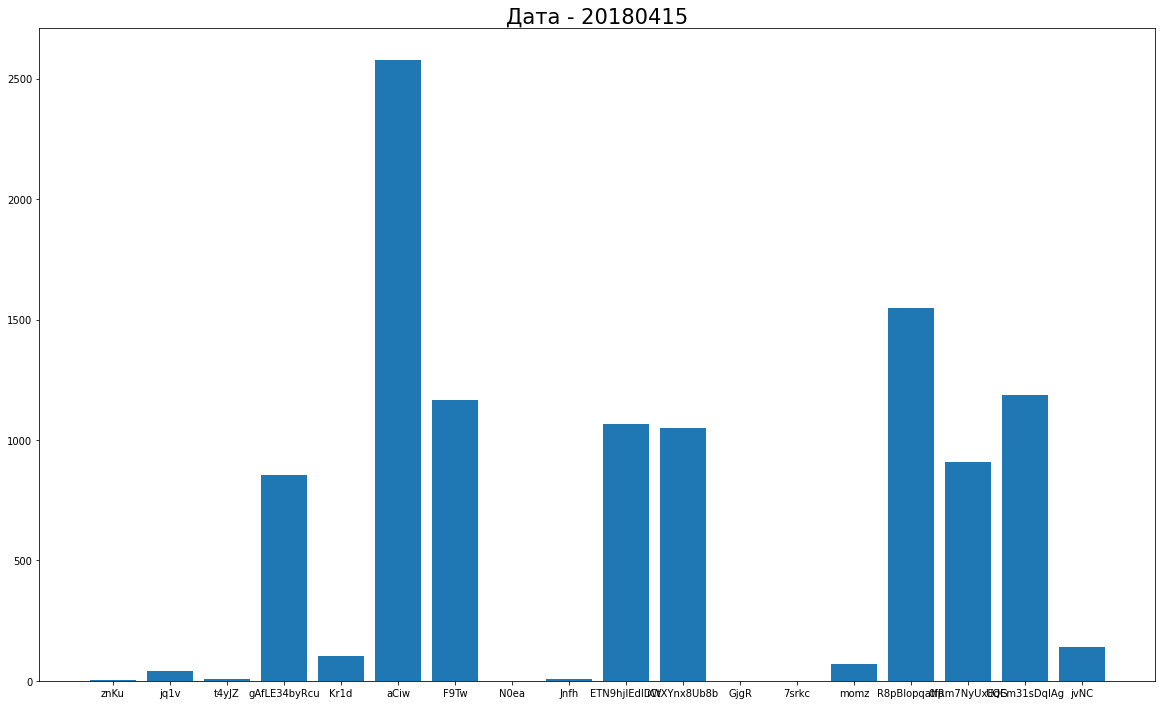

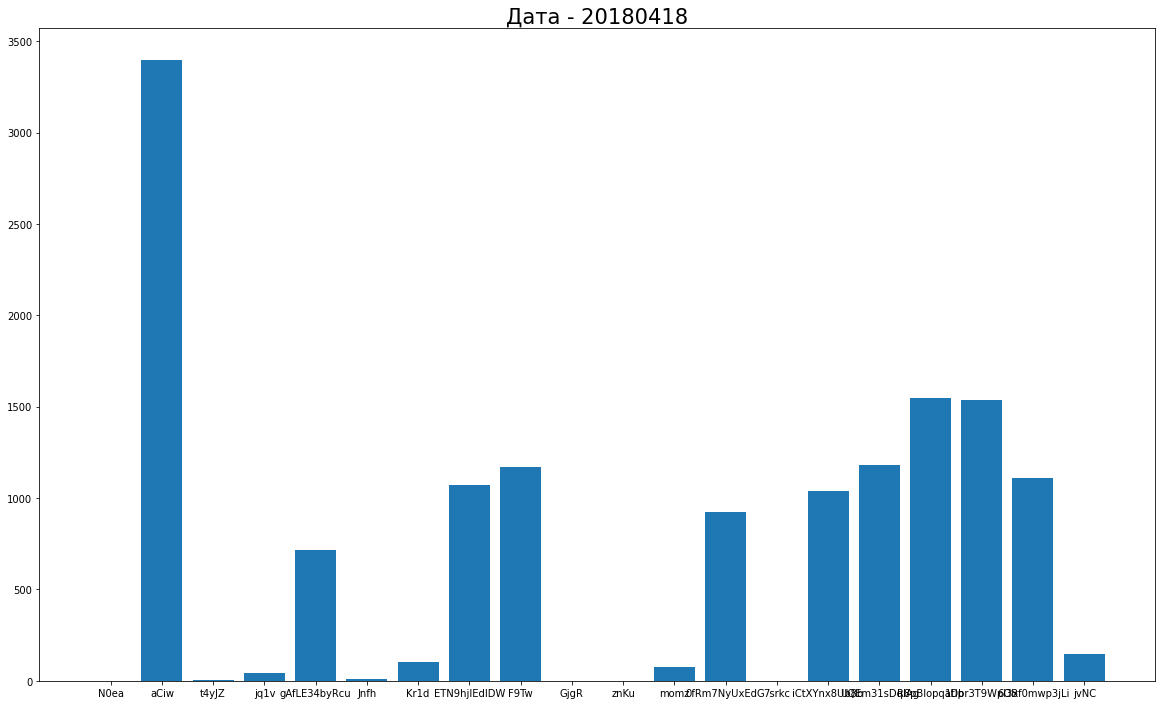

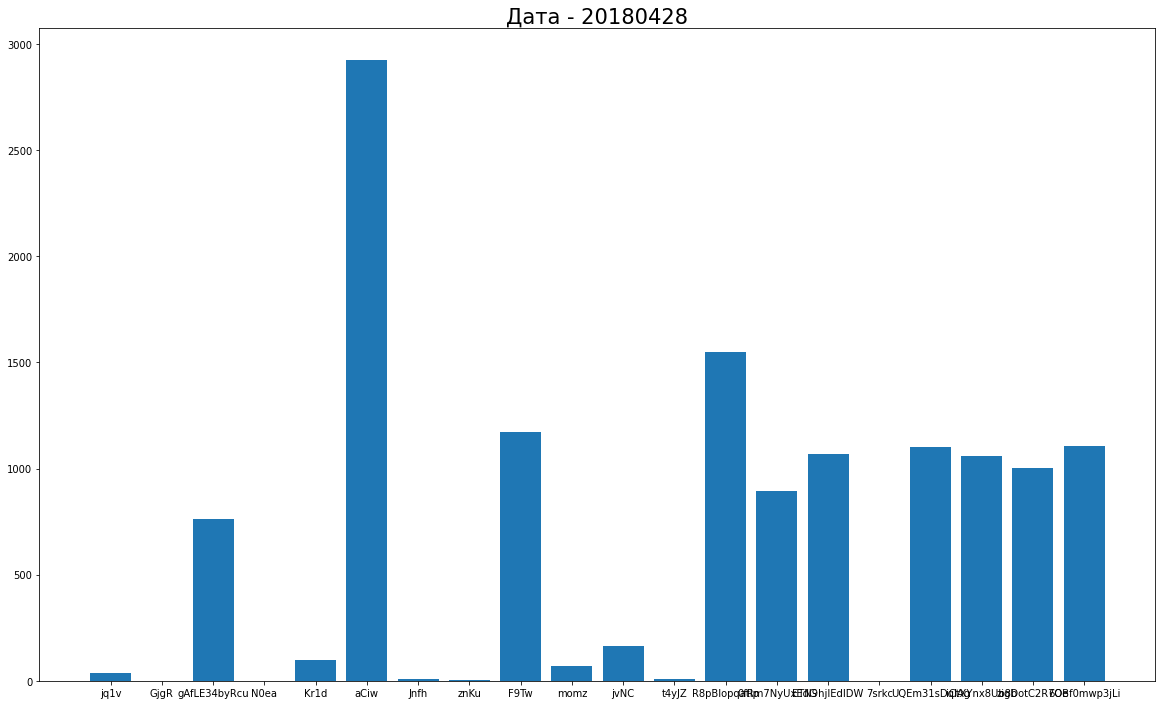

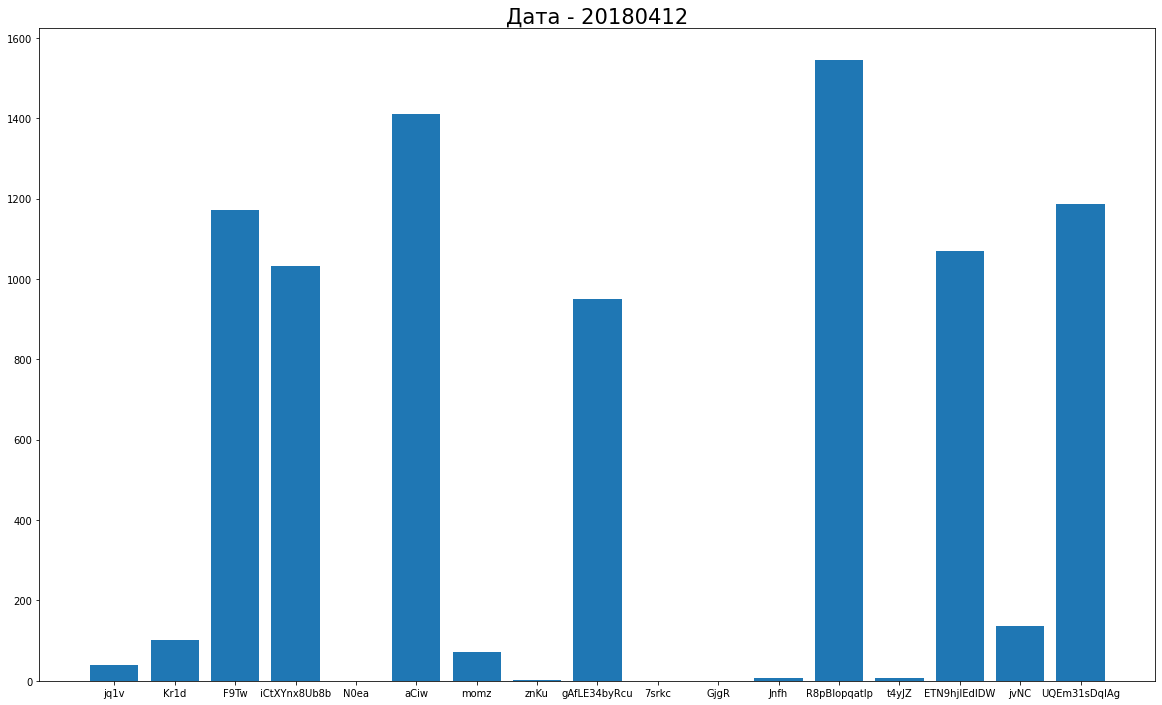

In [8]:
def arrange_price_function(search_table):
    """
    Возвращает средневзвешенную цену по каждому инструменту
    :param search_table:
    :return: 2 массива. 1 - День, 2 - Комбинации Инструменты за день + Цены
    """
    days_array = []
    return_array = []
    for __ in search_table:
        market_day = __
        market_day.reset_index(drop=True, inplace=True)
        days_array.append(market_day.loc[0, 'Дата'])
        market_day_uniq_instruments = market_day['Инструмент'].unique()
        market_day_instruments = []
        for _ in market_day_uniq_instruments:
            market_day_instruments.append(market_day.loc[market_day['Инструмент'] == _,:])
        instrument_name = []
        arrange_price_array = []
        for _ in market_day_instruments:
            instrument_buffer = _
            instrument_buffer.reset_index(drop=True, inplace=True)
            for i in range(instrument_buffer.shape[0]):
                instrument_buffer.loc[i, ' Объем'] = float(re.sub(r'[^0-9,]+', r'',str(instrument_buffer.loc[i, ' Объем'])).replace(',', '.'))
                instrument_buffer.loc[i,' Сумма'] = float(re.sub(r'[^0-9,]+', r'',str(instrument_buffer.loc[i,' Сумма'])).replace(',', '.'))
            instrument_name.append(instrument_buffer.loc[0, 'Инструмент'])
            arrange_price_array.append(sum(instrument_buffer[' Сумма']) / sum(instrument_buffer[' Объем']))


        plt.figure(figsize=(20,12))
        plt.bar(instrument_name, arrange_price_array)
        return_array.append([instrument_name, arrange_price_array])
        plt.title('Дата - ' + str(market_day.loc[1, 'Дата']), fontsize=21)
        print('DAY:', market_day.loc[1, 'Дата'])
        print(instrument_name)
        print(arrange_price_array)
        print('--------')
        plt.show()
    return days_array, return_array

#Запуск
days13, prices13 = arrange_price_function(day_order_complete_market)

# 1.4 Количество заявок клиентов по инструменту

DAY: 20180411
['GjgR', 'jq1v', 'N0ea', 'UQEm31sDqlAg', 'momz', 'jvNC', 'gAfLE34byRcu', 'Jnfh', '7srkc', 't4yJZ', 'aCiw', 'R8pBIopqatlp', 'ETN9hjIEdlDW', 'Kr1d', '0fRm7NyUxEdG', 'F9Tw', 'iCtXYnx8Ub8b', 'znKu', '1Dbr3T9Wpl3x', '6OBf0mwp3jLi']
[8850000.0, 27565300.0, 560640000.0, 2075.0, 15760.0, 820.0, 44122.0, 114600.0, 12920000.0, 52000.0, 101.0, 2204.0, 5683.0, 1178393.0, 659.0, 31947.0, 520.0, 533400.0, 607.0, 1.0]
--------
DAY: 20180413
['Kr1d', 'R8pBIopqatlp', 'jq1v', 'F9Tw', 'aCiw', 'GjgR', 'gAfLE34byRcu', 'momz', 'N0ea', 'znKu', 'UQEm31sDqlAg', 'Jnfh', 'iCtXYnx8Ub8b', '1Dbr3T9Wpl3x', 'ETN9hjIEdlDW', '7srkc', '0fRm7NyUxEdG', 't4yJZ', 'jvNC']
[2330597.0, 2844.0, 37367500.0, 43931.0, 3917.0, 19390000.0, 21405.0, 14500.0, 679180000.0, 895600.0, 13159.0, 2738400.0, 1174.0, 1348.0, 44712.0, 11830000.0, 617.0, 103000.0, 860.0]
--------
DAY: 20180717
['aCiw', '7srkc', 'N0ea', 'jq1v', 'momz', 'R8pBIopqatlp', 'F9Tw', 'Kr1d', 'jvNC', 't4yJZ', 'Jnfh', 'ETN9hjIEdlDW', 'GjgR', 'UQEm31sDqlAg', 

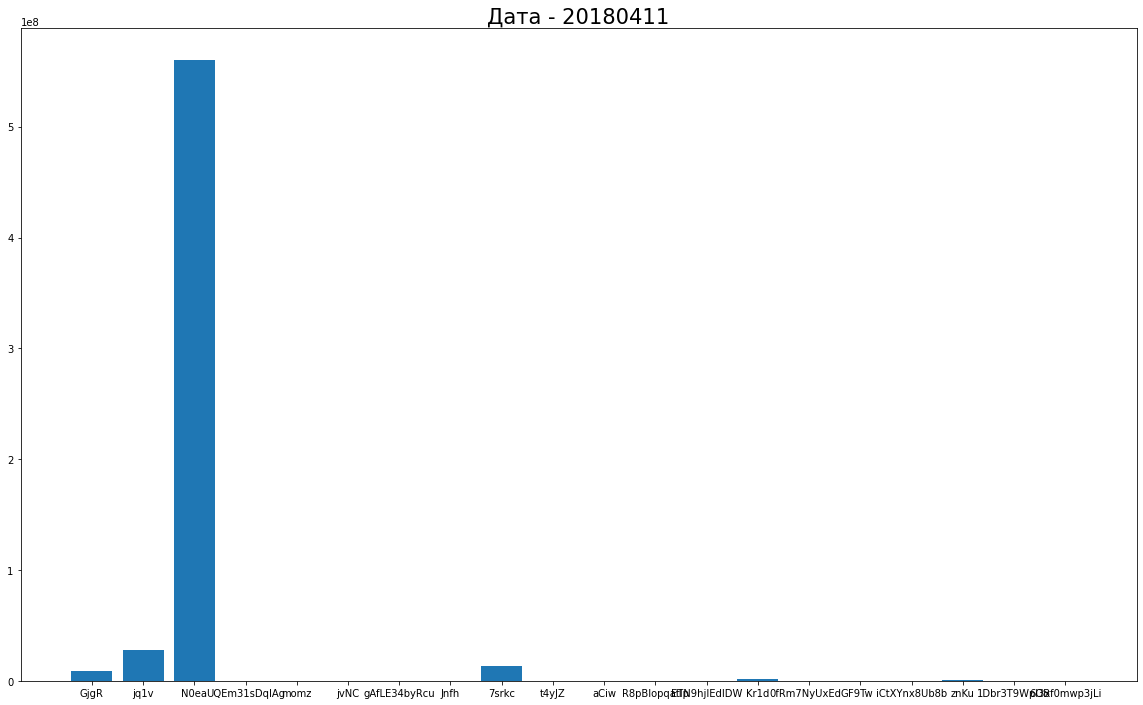

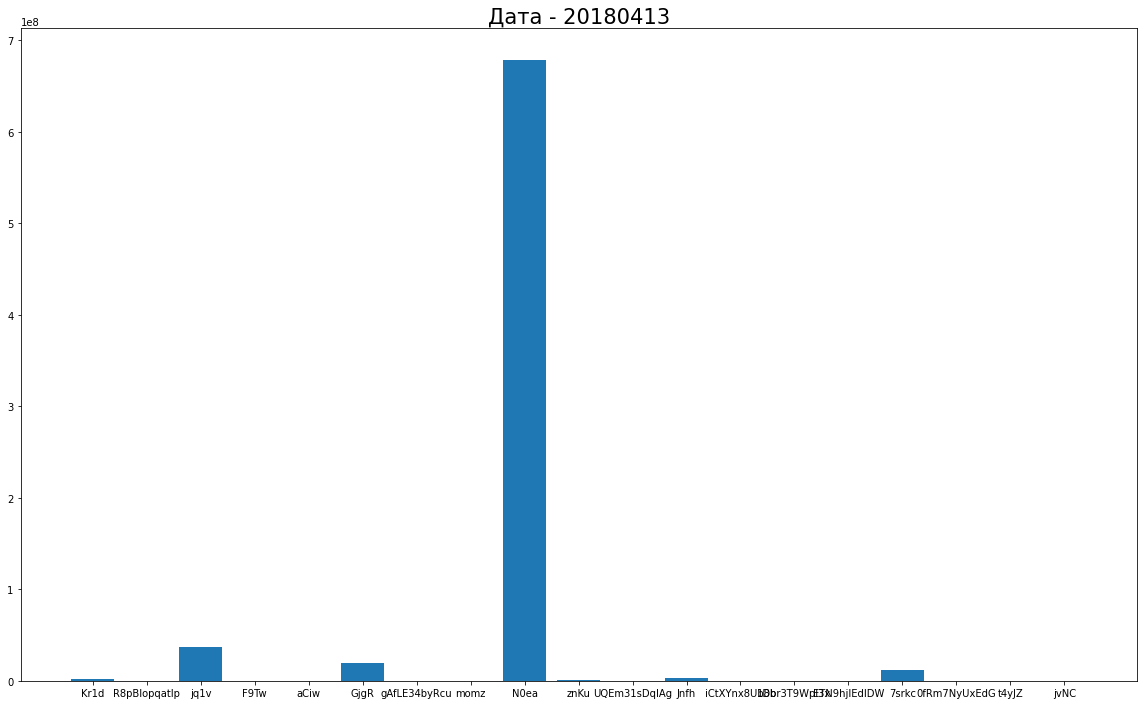

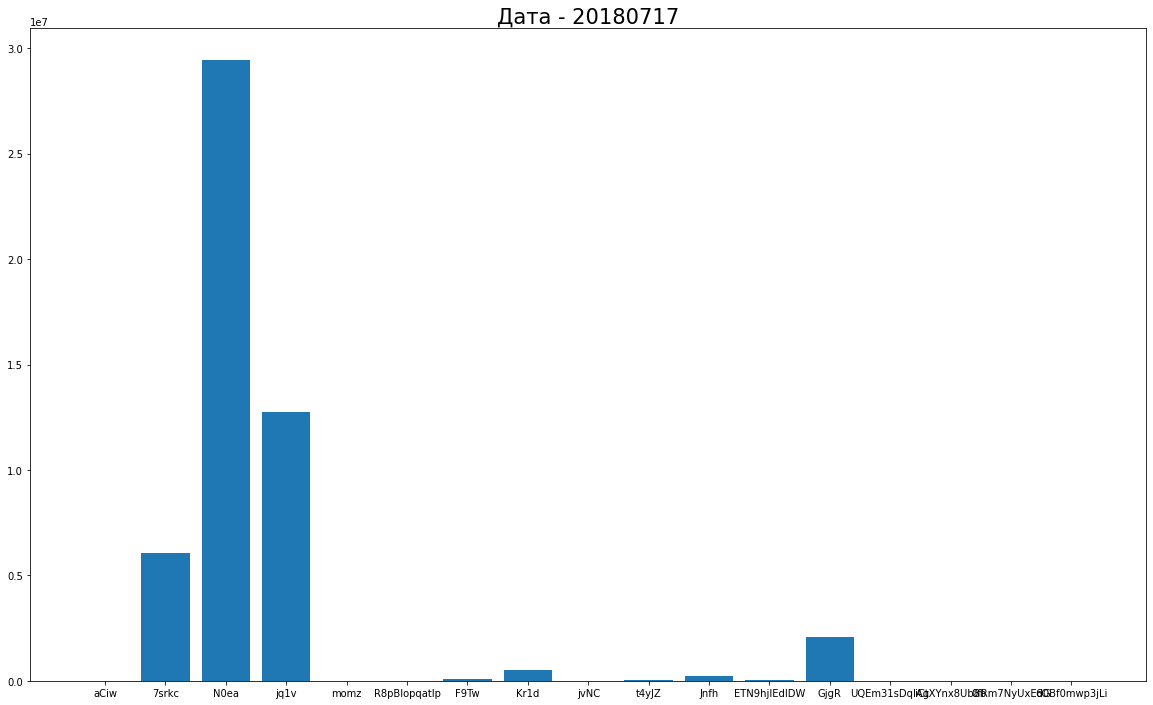

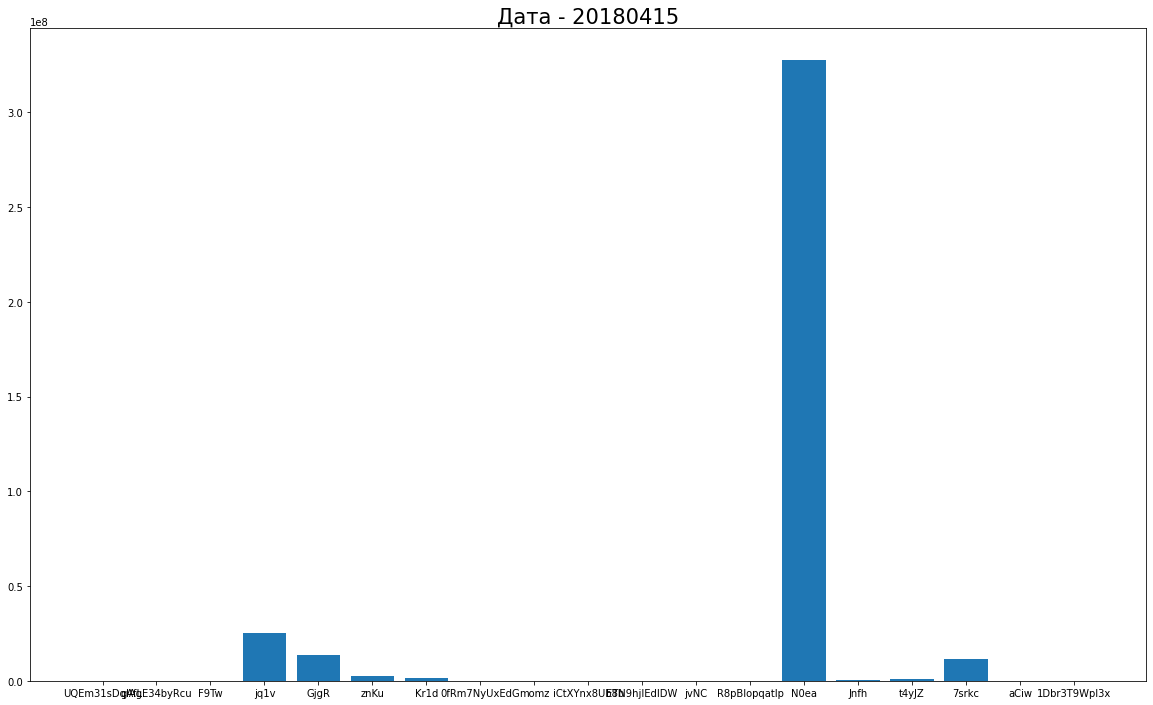

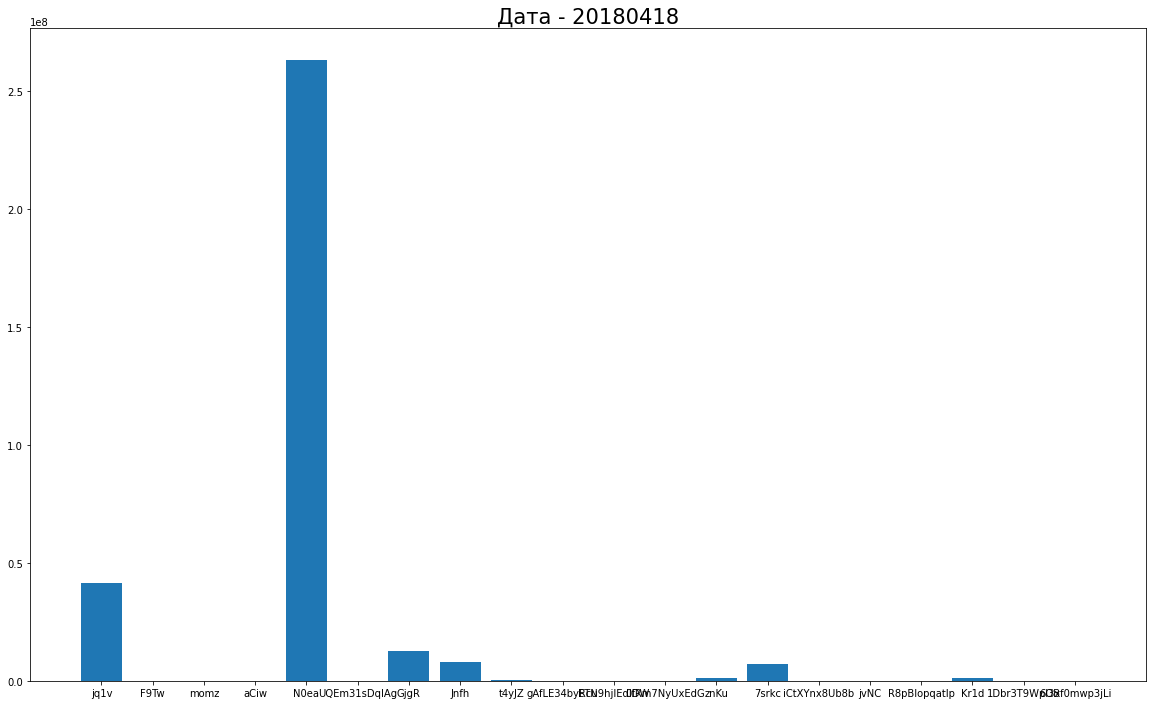

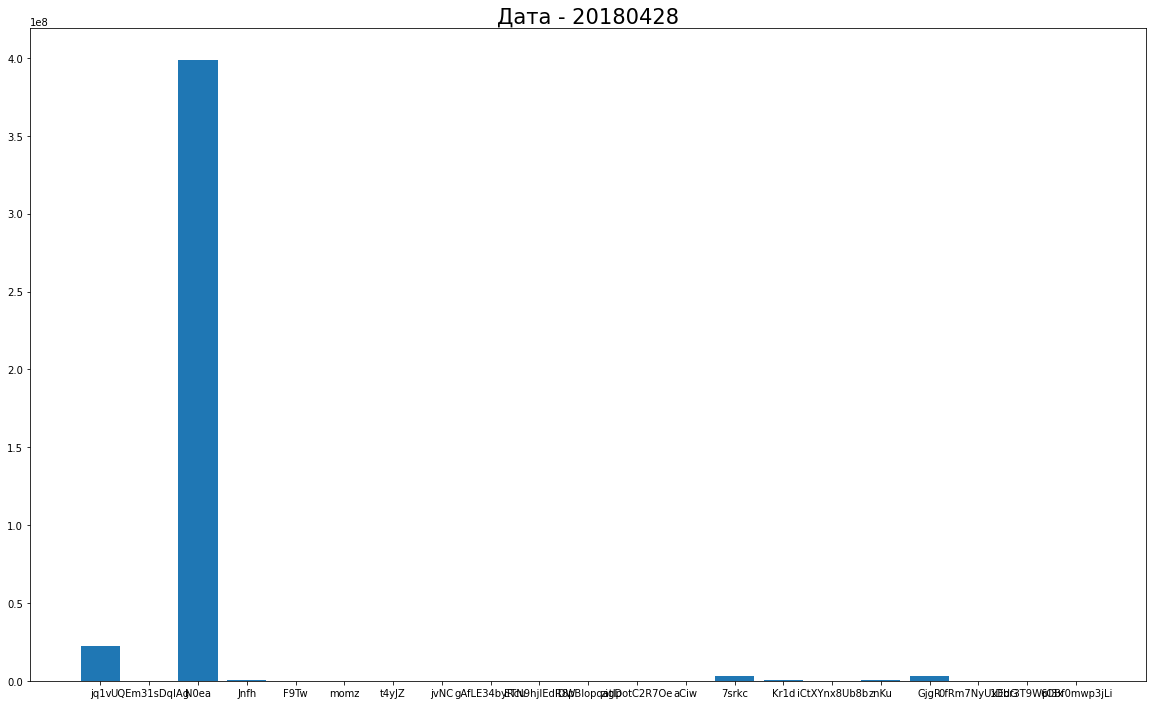

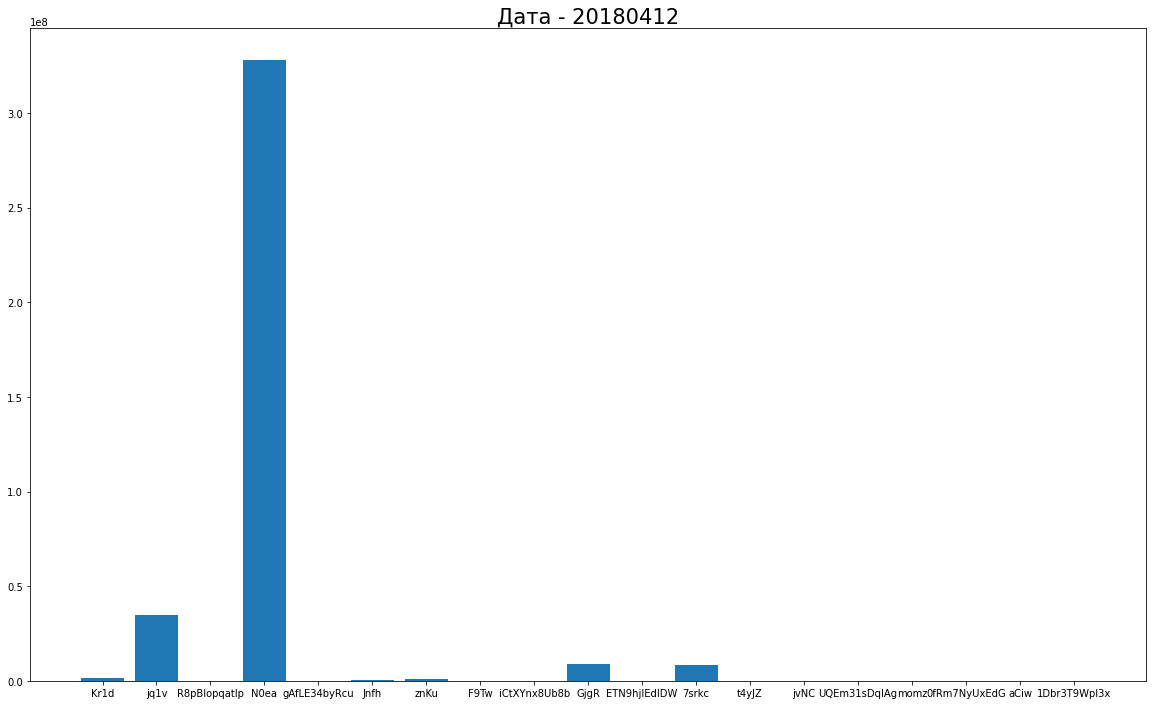

In [9]:
#Запуск
days14, results14 = volume_function(day_order_placed)

# 1.5 Количество снятых заявок клиентами по инструментам

DAY: 20180411
['GjgR', 'jq1v', 'N0ea', 'UQEm31sDqlAg', 'momz', 'jvNC', 'gAfLE34byRcu', 'Jnfh', '7srkc', 't4yJZ', 'aCiw', 'R8pBIopqatlp', 'ETN9hjIEdlDW', 'Kr1d', '0fRm7NyUxEdG', 'F9Tw', 'iCtXYnx8Ub8b', 'znKu', '1Dbr3T9Wpl3x', '6OBf0mwp3jLi']
[68, 1893, 187, 35, 111, 23, 326, 66, 25, 38, 43, 1086, 34, 544, 20, 79, 16, 70, 14, 1]
--------
DAY: 20180413
['Kr1d', 'R8pBIopqatlp', 'jq1v', 'F9Tw', 'aCiw', 'GjgR', 'gAfLE34byRcu', 'momz', 'N0ea', 'znKu', 'UQEm31sDqlAg', 'Jnfh', 'iCtXYnx8Ub8b', '1Dbr3T9Wpl3x', 'ETN9hjIEdlDW', '7srkc', '0fRm7NyUxEdG', 't4yJZ', 'jvNC']
[859, 2085, 2386, 228, 138, 128, 134, 101, 151, 96, 24, 88, 24, 9, 70, 30, 14, 37, 25]
--------
DAY: 20180717
['aCiw', '7srkc', 'N0ea', 'jq1v', 'momz', 'R8pBIopqatlp', 'F9Tw', 'Kr1d', 'jvNC', 't4yJZ', 'Jnfh', 'ETN9hjIEdlDW', 'GjgR', 'UQEm31sDqlAg', 'iCtXYnx8Ub8b', '0fRm7NyUxEdG', '6OBf0mwp3jLi']
[24, 42, 57, 970, 57, 26, 163, 331, 62, 34, 56, 102, 26, 15, 14, 12, 2]
--------
DAY: 20180415
['UQEm31sDqlAg', 'gAfLE34byRcu', 'F9Tw', 'jq1

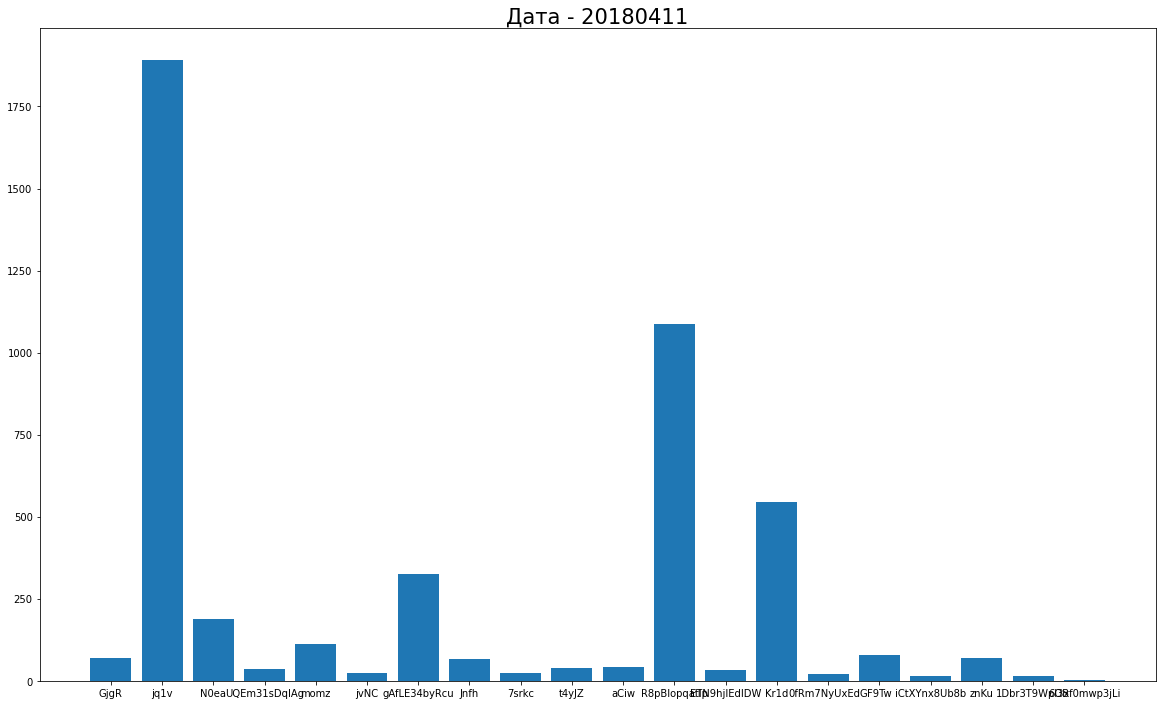

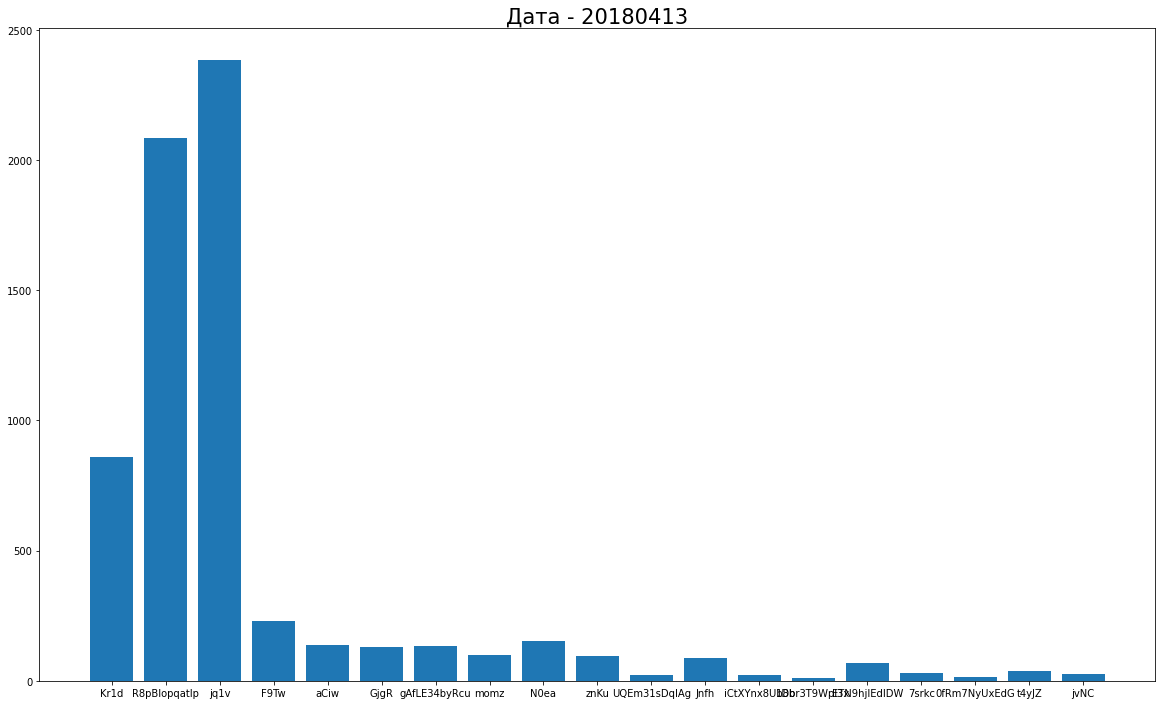

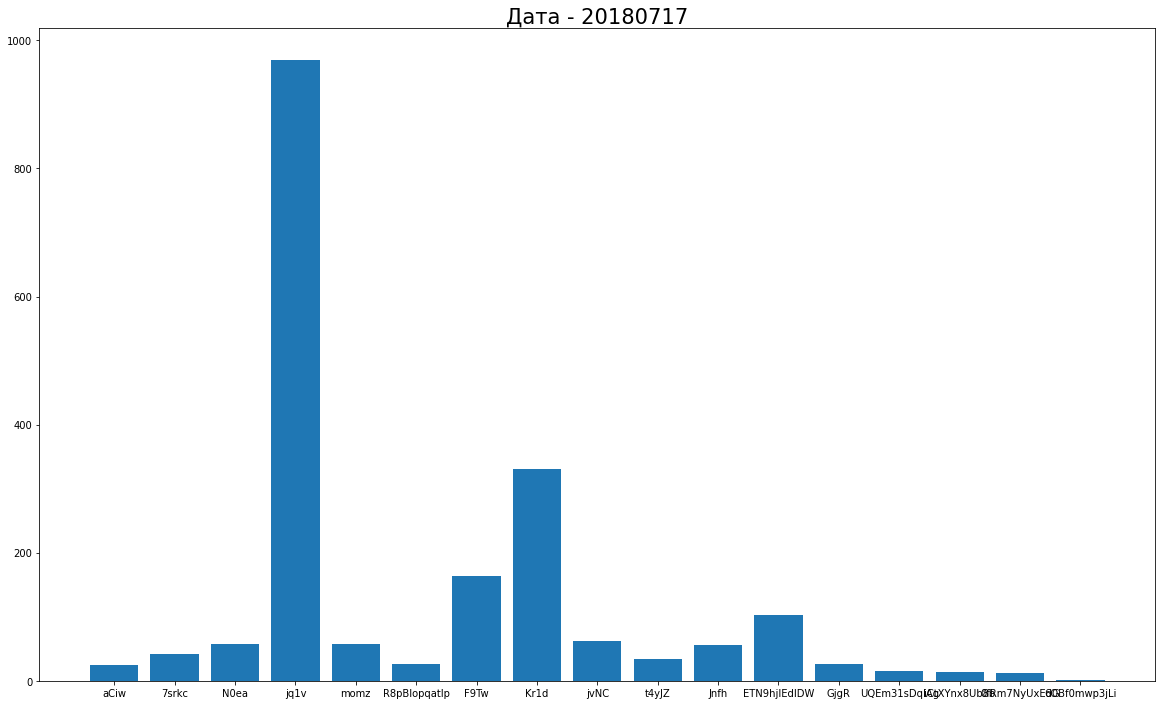

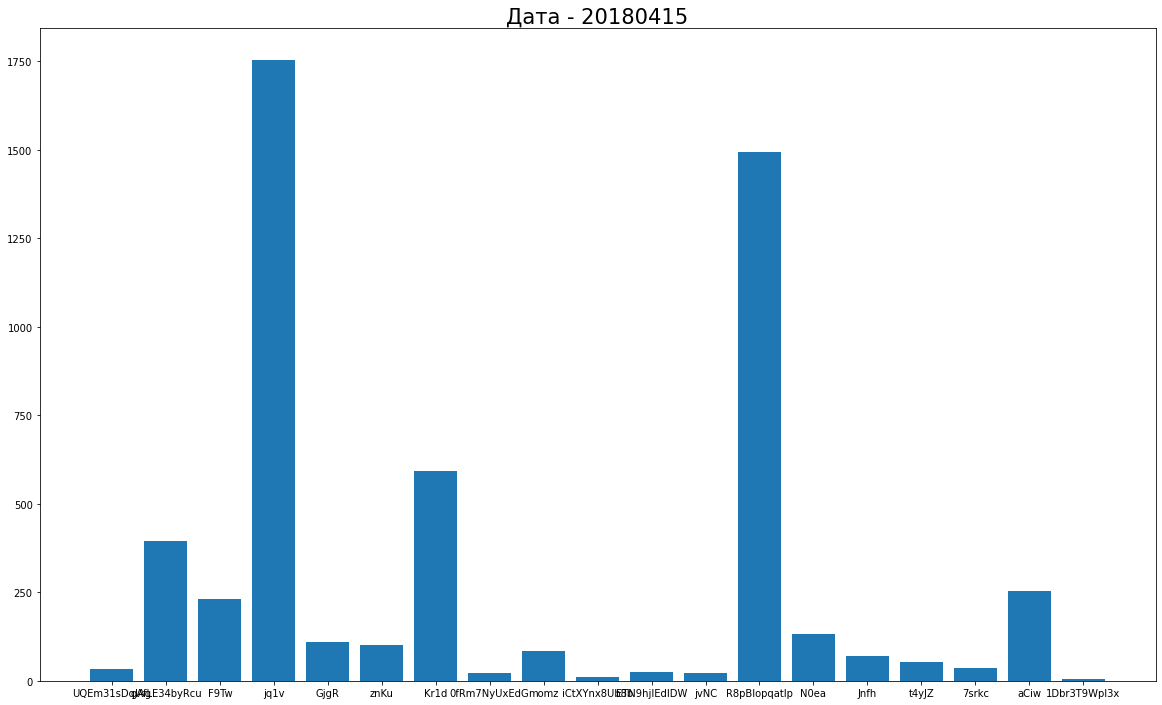

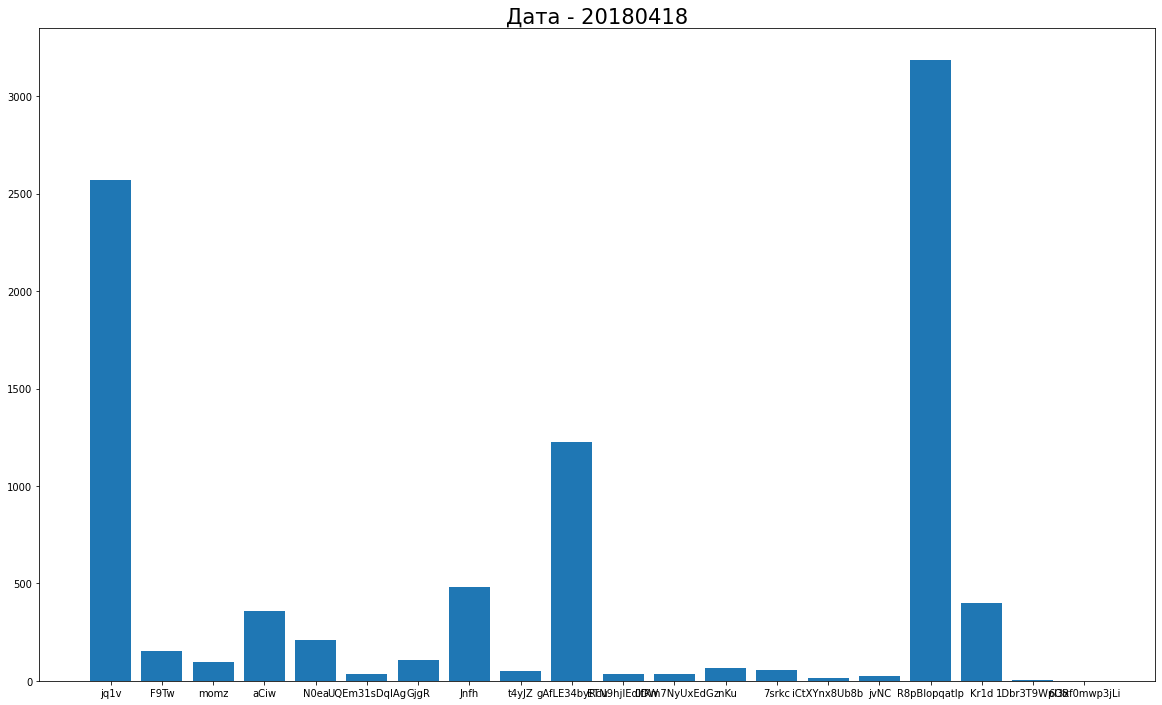

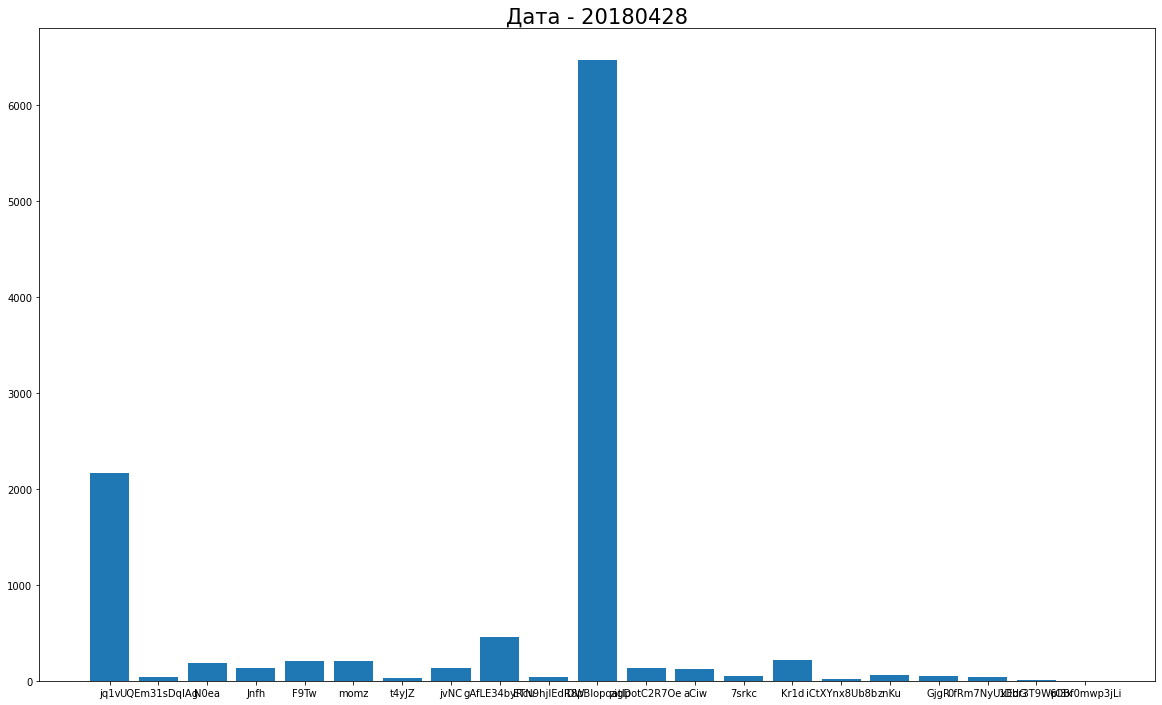

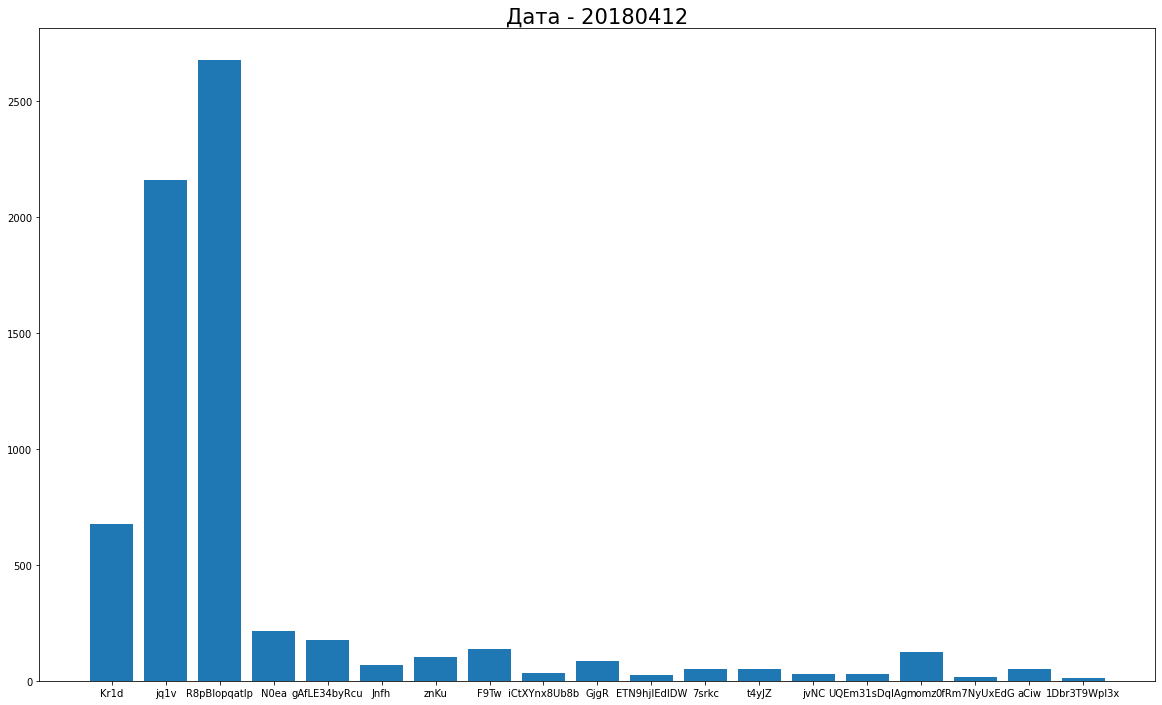

In [10]:
def canceled_volume_function(search_table):
    days_array = []
    results = []
    for __ in search_table:
        market_day = __
        market_day.reset_index(drop=True, inplace=True)
        days_array.append(market_day.loc[0, 'Дата'])
        market_day_uniq_instruments = market_day['Инструмент'].unique()
        market_day_instruments = []
        for _ in market_day_uniq_instruments:
            market_day_instruments.append(market_day.loc[market_day['Инструмент'] == _,:])

        canceled_instrument = []
        instrument_name = []
        for _ in market_day_instruments:
            instrument_buffer = _
            instrument_buffer.reset_index(drop=True, inplace=True)
            canceled_orders_counter = 0
            for i in range(instrument_buffer.shape[0]):
                instrument_buffer.loc[i, ' Объем'] = float(re.sub(r'[^0-9,]+', r'',str(instrument_buffer.loc[i, ' Объем'])).replace(',', '.'))
                if instrument_buffer.loc[i, ' Остаток объема'] != '  -   ':
                    instrument_buffer.loc[i, ' Остаток объема'] = float(re.sub(r'[^0-9,]+', r'',str(instrument_buffer.loc[i, ' Остаток объема'])).replace(',', '.'))
                if instrument_buffer.loc[i, ' Остаток объема'] == instrument_buffer.loc[i, ' Объем']:
                    canceled_orders_counter += 1
            canceled_instrument.append(canceled_orders_counter)
            instrument_name.append(instrument_buffer.loc[0, 'Инструмент'])


        plt.figure(figsize=(20,12))
        plt.bar(instrument_name, canceled_instrument)
        results.append([instrument_name, canceled_instrument])
        plt.title('Дата - ' + str(market_day.loc[1, 'Дата']), fontsize=21)
        print('DAY:', market_day.loc[1, 'Дата'])
        print(instrument_name)
        print(canceled_instrument)
        print('--------')
        plt.show()
    return days_array, results
#Запуск
days15, results15 = canceled_volume_function(day_order_placed)

# 2.1
# Отношение объема по инструменту клиентов и рынка
# Фактически визуализирует долю клиентов на рынке по каждому инструменту

MARKET:
DAY: 20180411
['jq1v', 'gAfLE34byRcu', 'N0ea', 'F9Tw', 'Kr1d', 'znKu', '7srkc', 'momz', 'GjgR', 'ETN9hjIEdlDW', 'Jnfh', 'UQEm31sDqlAg', 'aCiw', 'R8pBIopqatlp', 'jvNC', 'iCtXYnx8Ub8b', 't4yJZ', '1Dbr3T9Wpl3x']
[49885500.0, 33724.0, 92310000.0, 5589.0, 78148.0, 1030100.0, 1700000.0, 9600.0, 3900000.0, 3339.0, 20300.0, 1334.0, 41.0, 141.0, 50.0, 87.0, 15000.0, 16.0]
--------
CLIENT:
DAY: 20180411
['jq1v', 'gAfLE34byRcu', 'N0ea', '7srkc', 'F9Tw', 'znKu', 'Kr1d', 'momz', 'GjgR', 'ETN9hjIEdlDW', 'UQEm31sDqlAg', 'aCiw', 'R8pBIopqatlp', 'iCtXYnx8Ub8b', 'Jnfh', 't4yJZ', 'jvNC', '1Dbr3T9Wpl3x']
[9313900.0, 15802.0, 64460000.0, 1370000.0, 4390.0, 154800.0, 71166.0, 4520.0, 2260000.0, 1244.0, 245.0, 15.0, 121.0, 3.0, 3300.0, 10000.0, 10.0, 16.0]
--------
MARKET:
DAY: 20180413
['jq1v', 'znKu', 'Kr1d', 'Jnfh', 'gAfLE34byRcu', 'aCiw', 'R8pBIopqatlp', 'F9Tw', 'N0ea', 'GjgR', 'ETN9hjIEdlDW', 'momz', 'iCtXYnx8Ub8b', 't4yJZ', '1Dbr3T9Wpl3x', '7srkc', 'jvNC', 'UQEm31sDqlAg', '0fRm7NyUxEdG']
[79865

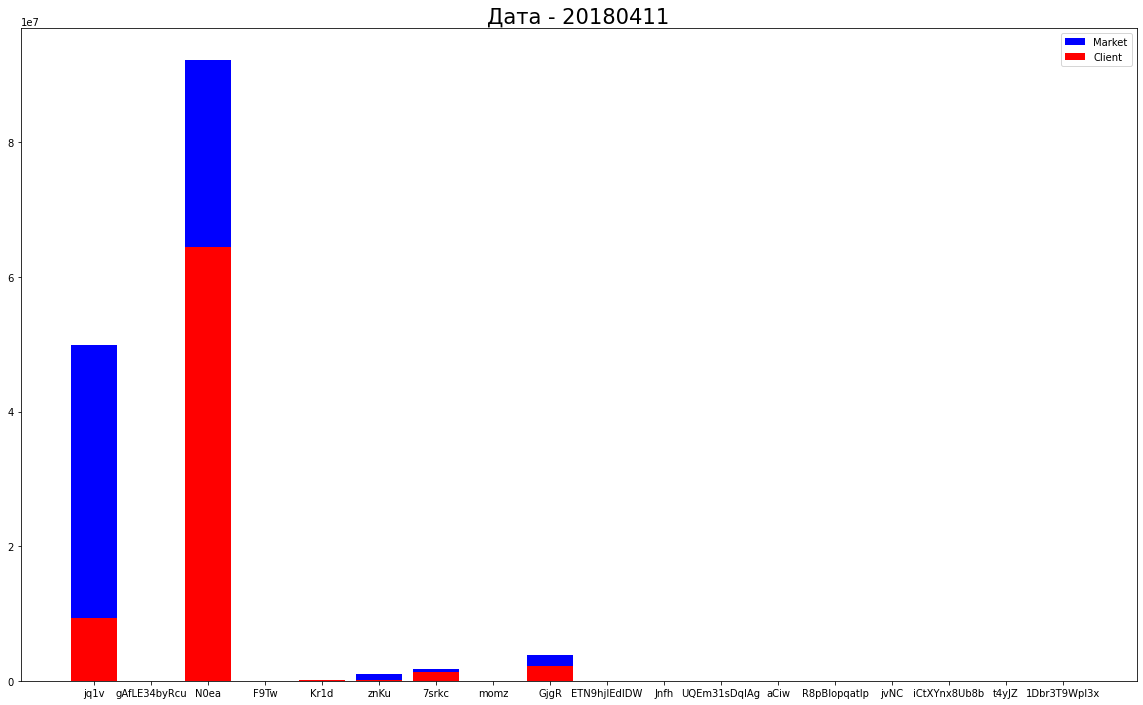

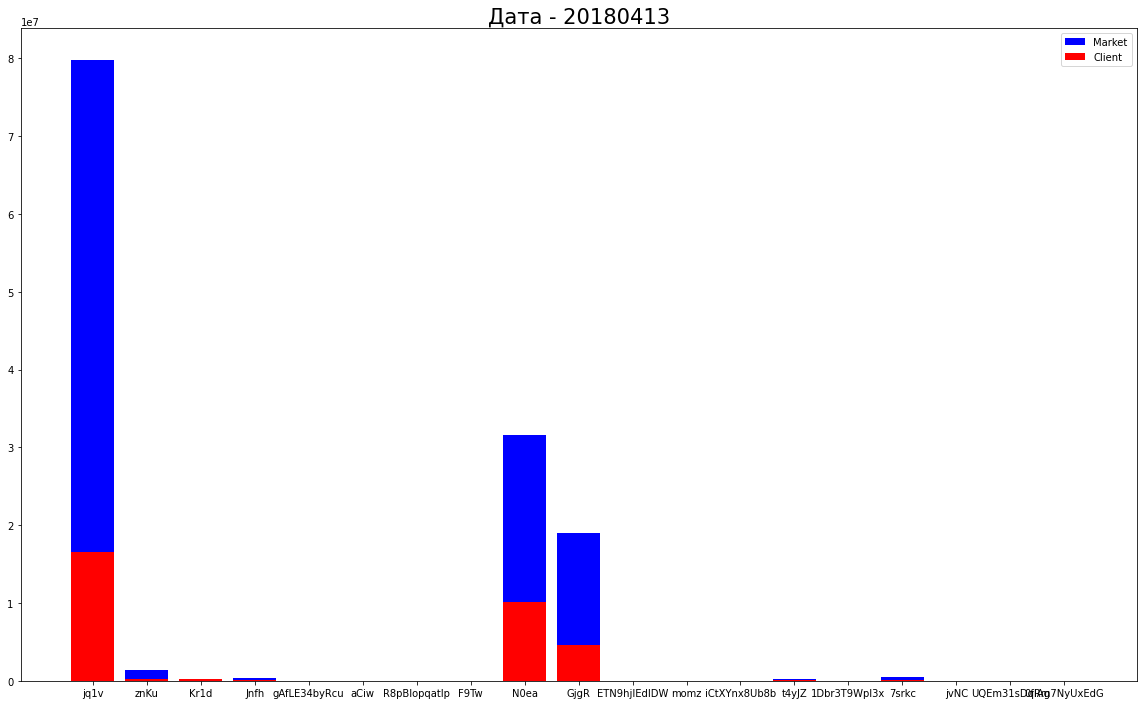

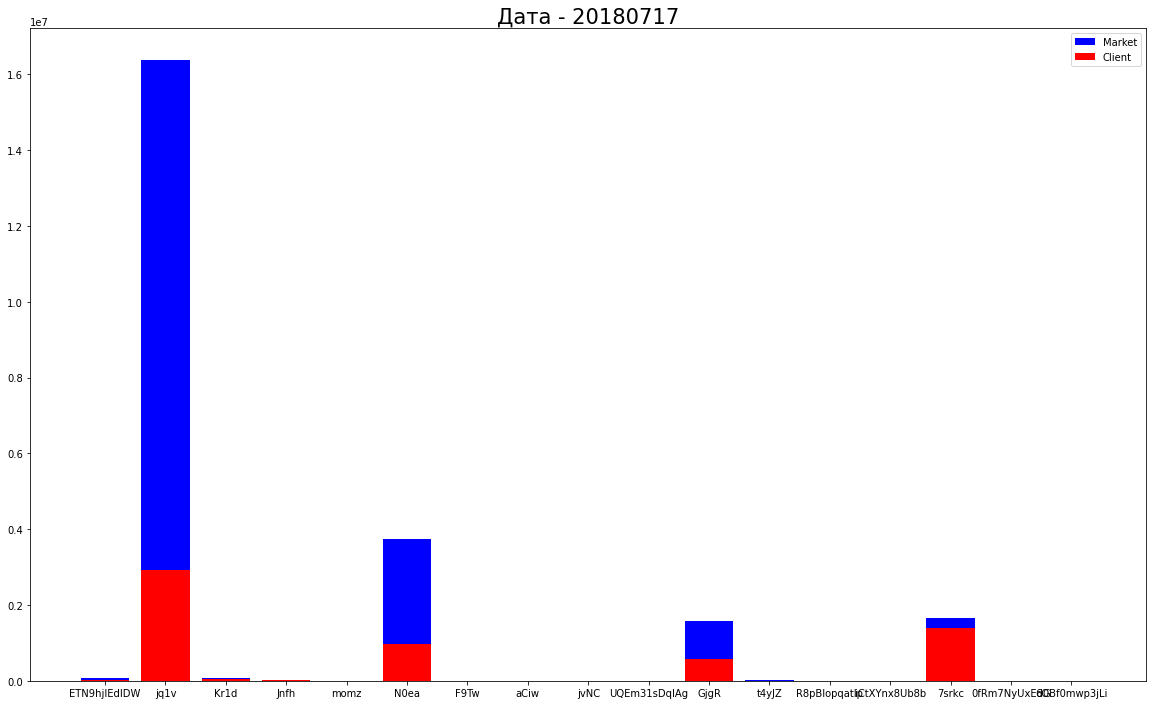

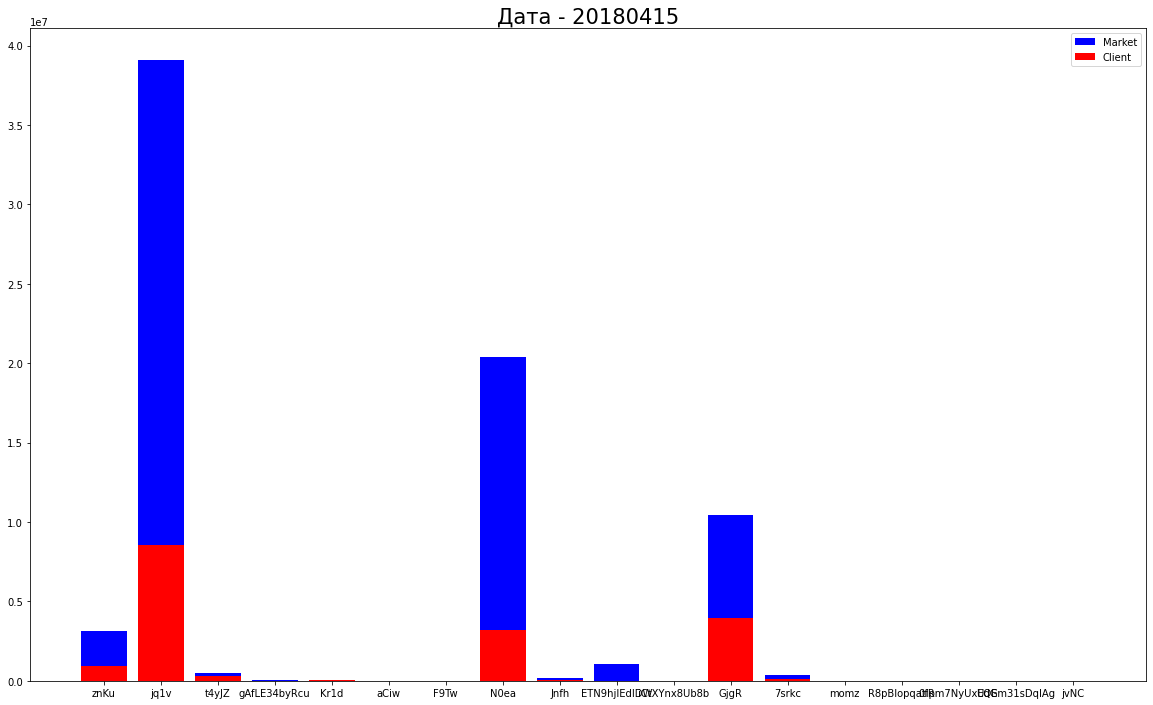

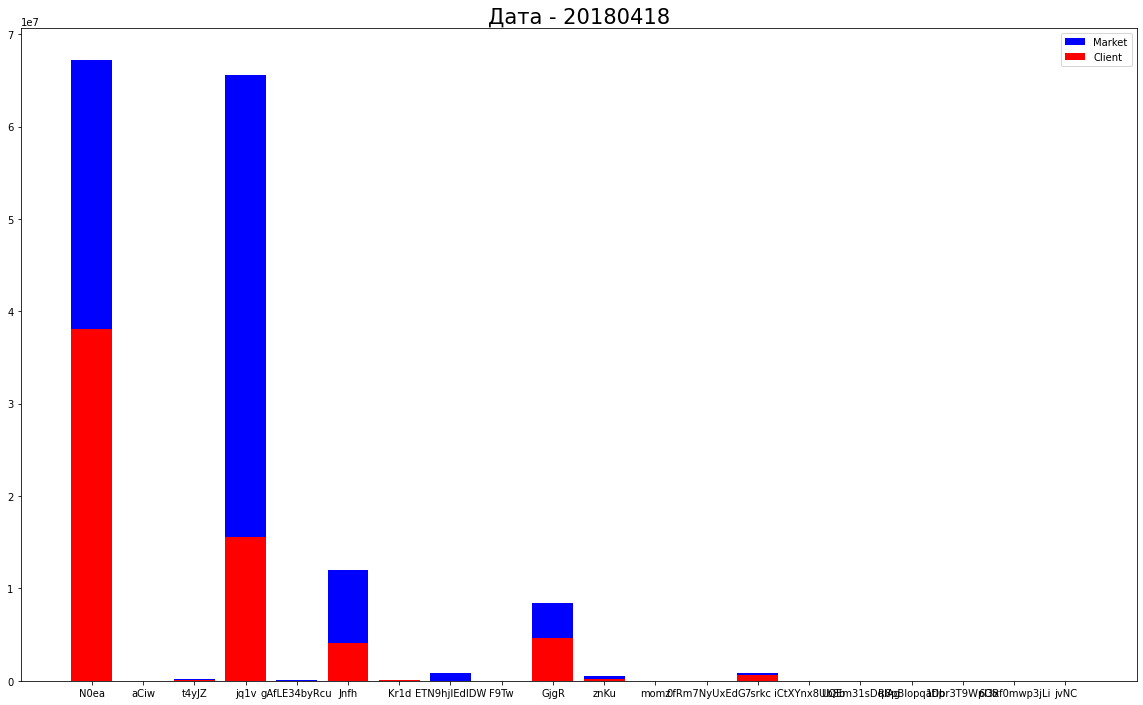

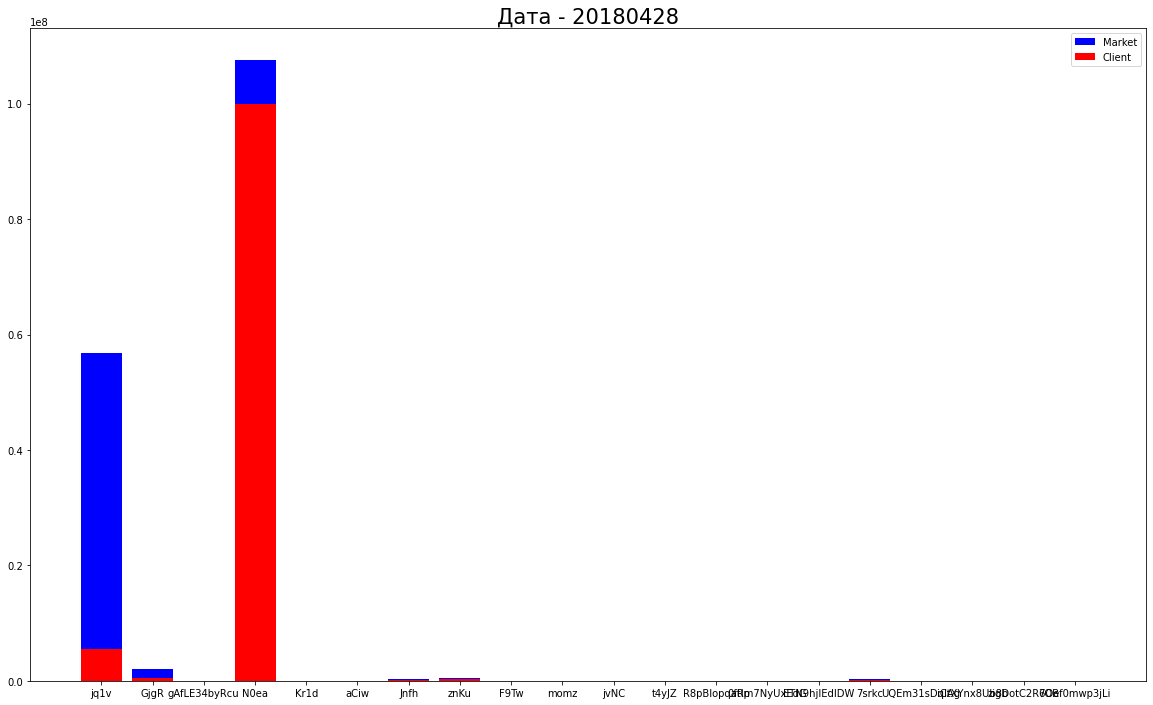

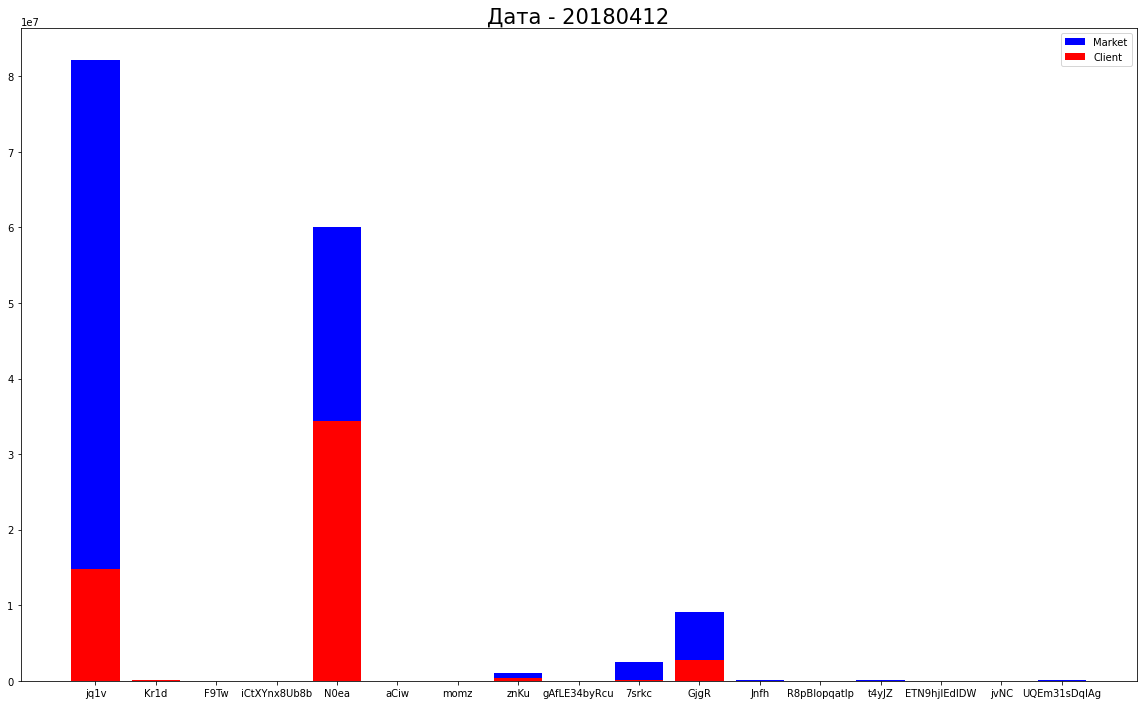

In [11]:
def volume_extended_function(search_table, search_table_2):
    """
    Возвращает отношение клиенты/инструменты к рынок/инструмент
    :param search_table:
    :param search_table_2:
    :return:
    """
    days_array = []
    results = []
    for __ in range(len(search_table)):

        market_day = search_table_2[__]
        market_day.reset_index(drop=True, inplace=True)
        plt.figure(figsize=(20,12))
        plt.title('Дата - ' + str(market_day.loc[1, 'Дата']), fontsize=21)
        days_array.append(market_day.loc[0, 'Дата'])
        market_day_uniq_instruments = market_day['Инструмент'].unique()
        market_day_instruments = []
        for _ in market_day_uniq_instruments:
            market_day_instruments.append(market_day.loc[market_day['Инструмент'] == _,:])

        market_instrument_volume = []
        instrument_name = []
        for _ in market_day_instruments:
            instrument_buffer = _
            instrument_buffer.reset_index(drop=True, inplace=True)
            for i in range(instrument_buffer.shape[0]):
                instrument_buffer.loc[i, ' Объем'] = float(re.sub(r'[^0-9,]+', r'',str(instrument_buffer.loc[i, ' Объем'])).replace(',', '.'))
            market_instrument_volume.append(sum(instrument_buffer[' Объем']))
            instrument_name.append(instrument_buffer.loc[0, 'Инструмент'])
        plt.bar(instrument_name, market_instrument_volume, color='blue', label='Market')
        print('MARKET:')
        print('DAY:', market_day.loc[1, 'Дата'])
        print(instrument_name)
        print(market_instrument_volume)
        print('--------')
        market_table = pd.DataFrame({'INSTRUMENT': instrument_name, 'VOLUME': market_instrument_volume})

        market_day = search_table[__]
        market_day.reset_index(drop=True, inplace=True)
        market_day_uniq_instruments = market_day['Инструмент'].unique()
        market_day_instruments = []
        for _ in market_day_uniq_instruments:
            market_day_instruments.append(market_day.loc[market_day['Инструмент'] == _,:])

        market_instrument_volume = []
        instrument_name = []
        for _ in market_day_instruments:
            instrument_buffer = _
            instrument_buffer.reset_index(drop=True, inplace=True)
            for i in range(instrument_buffer.shape[0]):
                instrument_buffer.loc[i, ' Объем'] = float(re.sub(r'[^0-9,]+', r'',str(instrument_buffer.loc[i, ' Объем'])).replace(',', '.'))
            market_instrument_volume.append(sum(instrument_buffer[' Объем']))
            instrument_name.append(instrument_buffer.loc[0, 'Инструмент'])
        plt.bar(instrument_name, market_instrument_volume, color='red', label='Client')
        client_table = pd.DataFrame({'INSTRUMENT': instrument_name, 'VOLUME': market_instrument_volume})
        result_table_day = pd.DataFrame(columns=['INSTRUMENT', 'VOLUME'])
        for _arrow_ in range(market_table.shape[0]):
            for __arrows__ in range(client_table.shape[0]):
                if client_table.loc[__arrows__, 'INSTRUMENT'] == market_table.loc[_arrow_, 'INSTRUMENT']:
                    result_table_day = result_table_day.append({'INSTRUMENT':client_table.loc[__arrows__, 'INSTRUMENT'],'VOLUME':float(client_table.loc[__arrows__, 'VOLUME']) / float(market_table.loc[_arrow_, 'VOLUME'])}, ignore_index=True)
        print('CLIENT:')
        print('DAY:', market_day.loc[1, 'Дата'])
        print(instrument_name)
        print(market_instrument_volume)
        print('--------')
        plt.legend(loc='upper right')
        plt.show()
        results.append(result_table_day)
    return days_array, results

def view21(MARKER, days, results):
    print('DAY IS: ', days[MARKER])
    print('RESULT')
    print(results[MARKER])

#Запуск
days21, results21 = volume_extended_function(day_order_complete, day_order_complete_market)

view21(0, days21, results21)

# 1.6
# Количество сделок клиента с контр-агентом
### Для каждой даты будут идти таблицы показывающие зависимость клиент-количество сделок

In [7]:
def client_contr_agent_table_function(search_table):
    days_array = []
    results = []
    for __ in search_table:
        market_day = __
        market_day.reset_index(drop=True, inplace=True)
        days_array.append(market_day.loc[0, 'Дата'])
        print('Дата - ' + str(market_day.loc[1, 'Дата']))
        client_array = []
        deals_array = []
        client_names_array = []
        for _ in market_day['Клиент'].unique():
            client_array.append(market_day.loc[market_day['Клиент'] == str(_)])
        for ___ in client_array:
            ___.reset_index(drop=True, inplace=True)
            client_names_array.append(___.loc[0, 'Клиент'])
            deals_array.append(___.loc[___['Клиент-констрагент'].astype(str) != 'nan'].shape[0])
        contr_table = pd.DataFrame({'Клиент': client_names_array, 'Количество сделок с контрагентом':deals_array})
        results.append(contr_table)
        print(contr_table)
        print('---------')
    return days_array, results

def view16(MARKER, days, results):
    print('DAY IS: ', days[MARKER])
    print('RESULT')
    print(results[MARKER])

#Запуск
days16, results16 = client_contr_agent_table_function(day_order_complete)
view16(0, days16, results16)

Дата - 20180411
          Клиент  Количество сделок с контрагентом
0     FOeP8czKYR                                 1
1     EreXr68inL                                 0
2     waoM17jmTo                                 6
3     rn2VwTyYQ9                                 0
4     JQ5Y8SzI0R                                 0
...          ...                               ...
1211  LtVOshGq2F                                 0
1212  zL7PciwQr8                                 0
1213  lyWXgpqTtA                                 1
1214  FlmWjn0JWQ                                 1
1215  lT2vgfflmA                                 0

[1216 rows x 2 columns]
---------
Дата - 20180413
          Клиент  Количество сделок с контрагентом
0     d6D8rJmCPq                                 0
1     yyAngcBURc                                 0
2     uYz1dZuzjv                                 4
3     In0soLGEhu                                26
4     DmXqknbDxL                                 0
...          ..

# 2.2
# Сделки отклоняющиеся более чем на X процентов

In [13]:
def client_abs_arrange_price_function(search_table):
    date_array = []
    arrange_day_prices = []
    for __ in search_table:
        market_day = __
        market_day.reset_index(drop=True, inplace=True)
        market_day_uniq_instruments = market_day['Инструмент'].unique()
        market_day_instruments = []
        for _ in market_day_uniq_instruments:
            market_day_instruments.append(market_day.loc[market_day['Инструмент'] == _,:])
        instrument_name = []
        arrange_price_array = []
        for _ in market_day_instruments:
            instrument_buffer = _
            instrument_buffer.reset_index(drop=True, inplace=True)
            for i in range(instrument_buffer.shape[0]):
                instrument_buffer.loc[i, ' Объем'] = float(re.sub(r'[^0-9,]+', r'',str(instrument_buffer.loc[i, ' Объем'])).replace(',', '.'))
                instrument_buffer.loc[i,' Цена'] = float(re.sub(r'[^0-9,]+', r'',str(instrument_buffer.loc[i,' Цена'])).replace(',', '.'))
            instrument_name.append(instrument_buffer.loc[0, 'Инструмент'])
            arrange_price_array.append(sum(instrument_buffer[' Объем'] * instrument_buffer[' Цена'] ) / sum(instrument_buffer[' Объем']))
        arrange_day_prices.append([arrange_price_array, instrument_name])
        date_array.append(market_day.loc[1, 'Дата'])

    return arrange_day_prices, date_array

#Запуск
results22_half, days22_half = client_abs_arrange_price_function(day_order_complete_market, day_order_complete)
#if list(unique_date_complete) != dates:
#   Проверяет что даты средних цен и даты по совершенным сделкам одинаковые и идут в одинаковом порядке
#    print('Проблемы с порядком дат в массиве средних цен и уникальных дат в таблице со сделками клиентов')

/Users/molozey/Desktop/Forecsys/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
def std_searching_clients(arrange, day_order_complete, INDICATOR_VALUE):
    days_array = []
    results = []
    for i in range(len(day_order_complete)):
        work_client_table = day_order_complete[i]
        work_client_table.reset_index(inplace=True, drop=True)
        days_array.append(work_client_table.loc[0, 'Дата'])
        CAUSE_ARRAY = []
        prices = arrange[i][0]
        instruments = arrange[i][1]
        print(instruments)
        instrument_client_array = []
        for _ in instruments:
            instrument_client_array.append(work_client_table.loc[work_client_table['Инструмент'].astype(str) == _])

        for arrow in range(len(instruments)):
            buffer_client = instrument_client_array[arrow]
            instrument_price = prices[arrow]
            buffer_client.reset_index(drop=True, inplace=True)
            for arrow_client in range(buffer_client.shape[0]):
                if (abs(float(re.sub(r'[^0-9,]+', r'',str(buffer_client.loc[arrow_client,' Цена'])).replace(',', '.')) -
                        instrument_price) / instrument_price) > INDICATOR_VALUE:
                    #print(buffer_client.loc[arrow_client])
                    #print('INSTRUMENT NAME:', instruments[arrow])
                    #print('INSTRUMENT STD PRICE:', instrument_price)
                    #print('---------')
                    CAUSE_ARRAY.append([buffer_client.loc[arrow_client, 'Клиент'], buffer_client.loc[arrow_client], instruments[arrow], instrument_price])
        results.append(CAUSE_ARRAY)
    return days_array, results

#Запуск
INDICATOR_VALUE = 0.1
days22, results22 = std_searching_clients(results22_half, day_order_complete, INDICATOR_VALUE)

['jq1v', 'gAfLE34byRcu', 'N0ea', 'F9Tw', 'Kr1d', 'znKu', '7srkc', 'momz', 'GjgR', 'ETN9hjIEdlDW', 'Jnfh', 'UQEm31sDqlAg', 'aCiw', 'R8pBIopqatlp', 'jvNC', 'iCtXYnx8Ub8b', 't4yJZ', '1Dbr3T9Wpl3x']
['jq1v', 'znKu', 'Kr1d', 'Jnfh', 'gAfLE34byRcu', 'aCiw', 'R8pBIopqatlp', 'F9Tw', 'N0ea', 'GjgR', 'ETN9hjIEdlDW', 'momz', 'iCtXYnx8Ub8b', 't4yJZ', '1Dbr3T9Wpl3x', '7srkc', 'jvNC', 'UQEm31sDqlAg', '0fRm7NyUxEdG']
['ETN9hjIEdlDW', 'jq1v', 'Kr1d', 'Jnfh', 'momz', 'N0ea', 'F9Tw', 'aCiw', 'jvNC', 'UQEm31sDqlAg', 'GjgR', 't4yJZ', 'R8pBIopqatlp', 'iCtXYnx8Ub8b', '7srkc', '0fRm7NyUxEdG', '6OBf0mwp3jLi']
['znKu', 'jq1v', 't4yJZ', 'gAfLE34byRcu', 'Kr1d', 'aCiw', 'F9Tw', 'N0ea', 'Jnfh', 'ETN9hjIEdlDW', 'iCtXYnx8Ub8b', 'GjgR', '7srkc', 'momz', 'R8pBIopqatlp', '0fRm7NyUxEdG', 'UQEm31sDqlAg', 'jvNC']
['N0ea', 'aCiw', 't4yJZ', 'jq1v', 'gAfLE34byRcu', 'Jnfh', 'Kr1d', 'ETN9hjIEdlDW', 'F9Tw', 'GjgR', 'znKu', 'momz', '0fRm7NyUxEdG', '7srkc', 'iCtXYnx8Ub8b', 'UQEm31sDqlAg', 'R8pBIopqatlp', '1Dbr3T9Wpl3x', '6OBf0mwp

In [15]:
sum_count = 0
for _ in results22:
    sum_count += len(_)
print('За все дни выявлено', sum_count, 'случаев')

За все дни выявлено 1238 случаев


# 2.4
### Максимальное количество единовременно снятых заявок

In [16]:
def canceled_client(work_table):
    day_array = []
    day_sign = []
    for _buffer_ in work_table:
        client_name = []
        max_length = []
        buffer = _buffer_.sort_values(by=['Время заявки'])
        buffer.reset_index(drop=True, inplace=True)
        data = buffer.loc[0,'Дата']
        day_sign.append(data)
        client_array = []
        for __uniq_client in buffer['Клиент'].unique():
            client_array.append(buffer.loc[buffer['Клиент'].astype(str) == __uniq_client])
        for I in range(len(client_array)):
            client_array[I].reset_index(drop=True, inplace=True)
            client_name.append(client_array[I].loc[0,'Клиент'])
            canceled_orders_maximum_length_local = 0
            canceled_orders_length_array = []
            for i in range(client_array[I].shape[0]):
                #print(client_array[I].loc[i, ' Остаток объема'])
                if str(client_array[I].loc[i, ' Остаток объема']) != '  -   ':
                    client_array[I].loc[i, ' Объем'] = float(re.sub(r'[^0-9,]+', r'',str(client_array[I].loc[i, ' Объем'])).replace(',', '.'))
                    client_array[I].loc[i, ' Остаток объема'] = float(re.sub(r'[^0-9,]+', r'',str(client_array[I].loc[i,  ' Остаток объема'])).replace(',', '.'))
                    if client_array[I].loc[i, ' Остаток объема'] == client_array[I].loc[i, ' Объем']:
                        canceled_orders_maximum_length_local += 1
                    if client_array[I].loc[i, ' Остаток объема'] != client_array[I].loc[i, ' Объем']:
                        if canceled_orders_maximum_length_local != 0:
                            canceled_orders_length_array.append(canceled_orders_maximum_length_local)
                            canceled_orders_maximum_length_local = 0

                if str(client_array[I].loc[i, ' Остаток объема']) == '  -   ':
                    if canceled_orders_maximum_length_local != 0:
                        canceled_orders_length_array.append(canceled_orders_maximum_length_local)
                        canceled_orders_maximum_length_local = 0
            if len(canceled_orders_length_array) != 0:
                max_length.append(max(canceled_orders_length_array))
            if len(canceled_orders_length_array) == 0:
                max_length.append(0)
        cancel_orders_table = pd.DataFrame({'Клиент': client_name, 'Максимальное количество единовременных отмен':max_length})
        day_array.append(cancel_orders_table)
    return day_array, day_sign

def view24(MARKER, answers, datas):
    print('DATA IS', datas[MARKER])
    print('INFO')
    print(answers[MARKER])
    print('КОЛИЧЕСТВО СЛУЧАЕВ', sum(answers[MARKER]['Максимальное количество единовременных отмен']))

#Запуск

results24, days24 = canceled_client(day_order_placed)

In [17]:
view24(0, results24,days24)

DATA IS           Клиент  Максимальное количество единовременных отмен
0     sDKqzZKVmd                                           405
1     3T92jdSjol                                             0
2     y5501HpTBm                                             0
3     wqnNnuDhM9                                             0
4     fmbtktgRnM                                             0
...          ...                                           ...
1763  Wb0gbcBFhI                                             0
1764  JqZJZwKwDl                                             0
1765  rrxz0vauow                                             0
1766  ws4DmkFPcV                                             0
1767  eRPyANgz7e                                             0

[1768 rows x 2 columns]
INFO
20180411


IndexError: invalid index to scalar variable.

# 3.1 Цепочки сделок наибольшей длины

In [18]:
def maximum_length_client(work_table):
    day_array = []
    day_sign = []
    for _buffer_ in work_table:
        client_name = []
        max_length = []
        buffer = _buffer_.sort_values(by=['Время'])
        data = buffer.loc[0,'Дата']
        day_sign.append(data)
        buffer.reset_index(drop=True, inplace=True)
        client_array = []
        for __uniq_client in buffer['Клиент'].unique():
            client_array.append(buffer.loc[buffer['Клиент'].astype(str) == __uniq_client])
        for I in range(len(client_array)):
            client_array[I].reset_index(drop=True, inplace=True)
            client_name.append(client_array[I].loc[0,'Клиент'])
            one_way_orders_maximum_length_local = 0
            one_way_orders_length_array = []
            type_operation = str(client_array[I].loc[0,'Покупка/Продажа'])
            start_price = float(re.sub(r'[^0-9,]+', r'',str(client_array[I].loc[0, ' Цена'])).replace(',', '.'))
            for i in range(1, client_array[I].shape[0]):
                #print(client_array[I].loc[i, ' Остаток объема'])
                client_array[I].loc[i, ' Цена'] = float(re.sub(r'[^0-9,]+', r'',str(client_array[I].loc[i, ' Цена'])).replace(',', '.'))
                if (str(client_array[I].loc[i, 'Покупка/Продажа']) == type_operation) and (client_array[I].loc[i, ' Цена'] > start_price):
                    one_way_orders_maximum_length_local += 1
                    start_price = float(client_array[I].loc[i, ' Цена'])
                else:
                    type_operation = str(client_array[I].loc[i,'Покупка/Продажа'])
                    start_price = float(client_array[I].loc[i, ' Цена'])
                    one_way_orders_length_array.append(one_way_orders_maximum_length_local)
            if len(one_way_orders_length_array) != 0:
                max_length.append(max(one_way_orders_length_array))
            if len(one_way_orders_length_array) == 0:
                max_length.append(0)
        cancel_orders_table = pd.DataFrame({'Клиент': client_name, 'Максимальное количество однонаправленных заявок':max_length})
        day_array.append(cancel_orders_table)
    return day_array, day_sign

def view32(MARKER, answers, datas):
    print('DAY IS:', datas[MARKER])
    print(answers[MARKER])
#Запуск
results31, days31 = maximum_length_client(day_order_complete)
view32(0, results31, days31)

/Users/molozey/Desktop/Forecsys/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


DAY IS: 20180411
          Клиент  Максимальное количество однонаправленных заявок
0     eSMedGkqyn                                                8
1     rn2VwTyYQ9                                                3
2     iqM7iqmA7b                                                0
3     bvMmLhDz4F                                                2
4     y3xyD0sVOV                                                6
...          ...                                              ...
1211  Wb0gbcBFhI                                                0
1212  ws4DmkFPcV                                                0
1213  oyKpEbdH0R                                                0
1214  jqUh3tjABn                                                0
1215  LtVOshGq2F                                                0

[1216 rows x 2 columns]


# 3.2 Разнонаправленные заявки в течение короткого времени

In [19]:
def time_parser(work_value):
    success_status = False
    # По хорошему нужно убрать комментирование, но я хочу чтобы в случае ошибки все "ломалось". Выше по коду есть такой же момент
    '''
    hour_ = None
    minute_ = None
    sec_ = None
    '''
    if len(work_value) == 5:
        hour_ = work_value[:1]
        minute_ = work_value[1:3]
        sec_ = work_value[3:]
        success_status = True
    if len(work_value) == 6:
        hour_ = work_value[:2]
        minute_ = work_value[2:4]
        sec_ = work_value[4:]
        success_status = True
#   Исключение связанное с возможностью некорректной даты
    if not success_status:
        print('Время в таблице указанно некорректно')
    return hour_, minute_, sec_


def table_normalize_time(work_table_placed):
    work_table_placed = work_table_placed.sort_values(by=['Время заявки'])
    work_table_placed.reset_index(drop=True, inplace=True)
    for _ in range(work_table_placed.shape[0]):
        work_value_ = str(work_table_placed.loc[_,'Время заявки'])
        hour, minute, sec = time_parser(work_value_)
        work_table_placed.loc[_, 'Час_открытие'] = hour
        work_table_placed.loc[_, 'Минута_открытие'] = minute
        work_table_placed.loc[_, 'Секунда_открытие'] = sec
        work_value_ = str(work_table_placed.loc[_,'Время снятия заявки'])
        hour, minute, sec = time_parser(work_value_)
        work_table_placed.loc[_, 'Час_снятие'] = hour
        work_table_placed.loc[_, 'Минута_снятие'] = minute
        work_table_placed.loc[_, 'Секунда_снятие'] = sec
    return work_table_placed


def detection_short_time(buffer, null_hour, null_minute, null_sec, HOUR_EXTENDED, MINUTE_EXTENDED, SEC_EXTENDED):
    NH = int(null_hour)
    NM = int(null_minute)
    NC = int(null_sec)
    NC_SEC_EXTENDED = NC + SEC_EXTENDED
    MINUTE_ADDING = NC_SEC_EXTENDED // 60
    REAL_SEC = NC_SEC_EXTENDED % 60
    NM_MINUTE_EXTENDED = NM + MINUTE_EXTENDED + MINUTE_ADDING
    HOUR_ADDING = NM_MINUTE_EXTENDED // 60
    REAL_MINUTE = NM_MINUTE_EXTENDED % 60
    NH_HOUR_EXTENDED = NH + HOUR_EXTENDED + HOUR_ADDING
    REAL_HOUR = NH_HOUR_EXTENDED % 24
    logic_status = NH_HOUR_EXTENDED // 24
    if len(str(REAL_SEC)) == 1:
        REAL_SEC = '0' + str(REAL_SEC)
    if len(str(REAL_MINUTE)) == 1:
        REAL_MINUTE = '0' + str(REAL_MINUTE)
    if logic_status != 0:
        print('Плохо указаны границы поиска. Получается переход на следующий день')
    else:
        string_time = str(REAL_HOUR)+str(REAL_MINUTE)+str(REAL_SEC)
        buffer_ = buffer.loc[buffer['Время заявки'].astype(int) < int(string_time)]
        buffer_.reset_index(inplace=True, drop=True)


        detector = 0
        if buffer_.shape[0] != 0:
            first_operation = buffer_.loc[0, 'Покупка/Продажа']
            if buffer_.shape[0] != 1:
                for _ in range(1, buffer_.shape[0]):
                    if str(buffer_.loc[_, 'Покупка/Продажа']) != str(first_operation):
                        detector = 1
            else:
                detector = 0
    return detector, buffer_


def shorten_time_checker(work_table, client_name, TIMES):
    HOUR_EXTENDED = TIMES[0]
    MINUTE_EXTENDED = TIMES[1]
    SEC_EXTENDED = TIMES[2]
    det_summary = 0
    buffer_save = work_table[work_table['Клиент'] == client_name]
    buffer_save.reset_index(drop=True, inplace=True)

    for I in range(buffer_save.shape[0]):
        null_hour = buffer_save['Час_открытие'][I]
        null_minute = buffer_save['Минута_открытие'][I]
        null_sec = buffer_save['Секунда_открытие'][I]
        buffer = buffer_save.loc[I:]
        buffer.reset_index(drop=True, inplace=True)
        det, table = detection_short_time(buffer, null_hour, null_minute, null_sec, HOUR_EXTENDED, MINUTE_EXTENDED, SEC_EXTENDED)
        det_summary += det
    return det_summary


def days_shorten_time_checker(big_table):
    return_tables = []
    return_dates = []

    ###         Настройка временного интервала на котором будет искаться разнонаправленность
    HOUR_INTERVAL = 0
    MINUTE_INTERVAL = 40
    SEC_INTERVAL = 0
    ###         Настройка временного интервала на котором будет искаться разнонаправленность

    TIME = [HOUR_INTERVAL, MINUTE_INTERVAL, SEC_INTERVAL]
    for _big_table_ in big_table:
        _big_table_.reset_index(inplace=True, drop=True)
        return_dates.append(_big_table_.loc[0,'Дата'])
        working_table = table_normalize_time(_big_table_)
        small_table_client_names = []
        small_table_accident_counter = []
        for client_names in working_table['Клиент'].unique():
            small_table_client_names.append(client_names)
            small_table_accident_counter.append(shorten_time_checker(working_table, client_names, TIME))
        return_table = pd.DataFrame({'Клиент': small_table_client_names, 'Количество случаев': small_table_accident_counter})
        return_tables.append(return_table)
    return  return_dates, return_tables

def view32(MARKER, days, answers):
    print('DAY IS:', days[MARKER])
    print(answers[MARKER])
    
#Запуск
#Выдает массив дат для поиска и массив из таблиц = пары КЛИЕНТ - КОЛИЧЕСТВО СЛУЧАЕВ
days32, results32 = days_shorten_time_checker(day_order_placed)
view32(0, days32, results32)

DAY IS: 20180411
          Клиент  Количество случаев
0     sDKqzZKVmd                 906
1     3T92jdSjol                   0
2     y5501HpTBm                   1
3     wqnNnuDhM9                   0
4     fmbtktgRnM                   0
...          ...                 ...
1763  Wb0gbcBFhI                   0
1764  JqZJZwKwDl                   0
1765  rrxz0vauow                   0
1766  ws4DmkFPcV                   0
1767  eRPyANgz7e                   0

[1768 rows x 2 columns]


# 3.3 Доля сделок одного клиента в сделках другого клиента у одного участника торгов

## Я не уверен, что корректно понял что тут требуется сделать. Мое понимание трактуется как, посмотреть на общий объем сделок с контрагентом / общий объем сделок

In [20]:
def contr_volume_checker(working_table, MARKER_VALUE):
    tables = []
    days = []
    for _day_order_complete_ in working_table:
        _day_order_complete_.reset_index(inplace=True, drop=True)
        days.append(_day_order_complete_.loc[0,'Дата'])
        clients = []
        client_status = []
        buffer_day = _day_order_complete_
        for _ in buffer_day['Клиент'].unique():
            buffer_client = buffer_day.loc[buffer_day['Клиент'] == _]
            clients.append(_)
            buffer_client.reset_index(inplace=True, drop=True)
            CLIENT_STATUS = 0
            for i in range(0, buffer_client.shape[0]):
                buffer_client.loc[i, ' Сумма'] = float(re.sub(r'[^0-9,]+', r'',str(buffer_client.loc[i, ' Сумма'])).replace(',', '.'))
            for __ in buffer_client['Инструмент'].unique():
                buffer_client_instrument = buffer_client.loc[buffer_client['Инструмент'] == __]
                buffer_client_instrument.reset_index(drop=True, inplace=True)
                buffer_client_instrument_all_volume = sum(buffer_client_instrument[' Сумма'])
                buffer_client_instrument_only_contr = buffer_client_instrument.loc[buffer_client_instrument['Клиент-констрагент'].astype(str) != 'nan']
                buffer_client_instrument_only_contr.reset_index(inplace=True, drop=True)
                buffer_client_instrument_contr_volume = sum(buffer_client_instrument_only_contr[' Сумма'])

                if buffer_client_instrument_contr_volume / buffer_client_instrument_all_volume > MARKER_VALUE:
                    CLIENT_STATUS += 1
            client_status.append(CLIENT_STATUS)
        buffer_table = pd.DataFrame({'Клиент': clients, 'Количество замеченных случаев': client_status})
        tables.append(buffer_table)
    return days,tables


def view33(MARKER, day, result):
    print('DAY IS:', day[MARKER])
    print('RESULTS:')
    print(result[MARKER])


#ЗАПУСК
detector_VALUE = 0.2
days33, results33 = contr_volume_checker(day_order_complete, detector_VALUE)
view33(0, days33, results33)

/Users/molozey/Desktop/Forecsys/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


DAY IS: 20180411
RESULTS:
          Клиент  Количество замеченных случаев
0     FOeP8czKYR                              0
1     EreXr68inL                              0
2     waoM17jmTo                              0
3     rn2VwTyYQ9                              0
4     JQ5Y8SzI0R                              0
...          ...                            ...
1211  LtVOshGq2F                              0
1212  zL7PciwQr8                              0
1213  lyWXgpqTtA                              1
1214  FlmWjn0JWQ                              1
1215  lT2vgfflmA                              0

[1216 rows x 2 columns]


# 4.1 Отличие средневзвешенной для продажа/покупка (контрагент)

In [21]:
def std_buy_sell_contr(DETECTOR_VALUE, work_table):
    output_tables = []
    output_dates = []
    for __day__ in work_table:
        buffer_day = __day__
        buffer_day.reset_index(inplace=True, drop=True)
        output_dates.append(buffer_day.loc[0, 'Дата'])
        client_array = []
        detections_array = []
        for _client_ in buffer_day['Клиент'].unique():
            buffer_client = buffer_day.loc[buffer_day['Клиент'] == _client_]
            buffer_client.reset_index(inplace=True, drop=True)
            client_array.append(_client_)
            detections = 0
            for __instrument__client in buffer_client['Инструмент'].unique():
                buffer_client_instrument = buffer_client.loc[buffer_client['Инструмент'] == __instrument__client]
                buffer_client_instrument.reset_index(inplace=True, drop=True)
                buffer_client_not_null_contr = buffer_client_instrument.loc[buffer_client_instrument['Клиент-констрагент'].astype(str) != 'nan']
                buffer_client_not_null_contr.reset_index(inplace=True, drop=True)
                for _contr_agent_in_client_ in buffer_client_not_null_contr['Клиент-констрагент'].unique():
                    buffer_client_contr_agent = buffer_client_not_null_contr.loc[buffer_client_not_null_contr['Клиент-констрагент'] == _contr_agent_in_client_]
                    buffer_client_contr_agent.reset_index(inplace=True, drop=True)
                    if len(buffer_client_contr_agent['Покупка/Продажа'].unique()) == 2:
                        for i in range(buffer_client_contr_agent.shape[0]):
                            buffer_client_contr_agent.loc[i,' Объем'] = float(re.sub(r'[^0-9,]+', r'',str(buffer_client_contr_agent.loc[i, ' Объем'])).replace(',', '.'))
                            buffer_client_contr_agent.loc[i,' Сумма'] = float(re.sub(r'[^0-9,]+', r'',str(buffer_client_contr_agent.loc[i, ' Сумма'])).replace(',', '.'))
                        #Средневзвешенная продажа
                        sell_arrange_price = sum(buffer_client_contr_agent.loc[buffer_client_contr_agent['Покупка/Продажа'].astype(str) == 'S'][' Сумма']) / sum(buffer_client_contr_agent.loc[buffer_client_contr_agent['Покупка/Продажа'].astype(str) == 'S'][' Объем'])
                        #Средневзвешенная покупка
                        buy_arrange_price = sum(buffer_client_contr_agent.loc[buffer_client_contr_agent['Покупка/Продажа'].astype(str) == 'B'][' Сумма']) / sum(buffer_client_contr_agent.loc[buffer_client_contr_agent['Покупка/Продажа'].astype(str) == 'B'][' Объем'])
                        #print(buffer_client_contr_agent)
                        #print('SELL PRICE:', sell_arrange_price)
                        #print('BUY PRICE:', buy_arrange_price)
                        if abs((buy_arrange_price - sell_arrange_price) / sell_arrange_price) > DETECTOR_VALUE:
                            # Опциональный вывод информации по выявленным случаям
                            #print(_client_)
                            #print(buffer_client_contr_agent)
                            #print('------')
                            #print('YES')
                            detections += 1
            detections_array.append(detections)
        output_table = pd.DataFrame({'Клиент':client_array, 'Количество случаев': detections_array})
        output_tables.append(output_table)
    return output_dates, output_tables

def view41(MARKER, day, result):
    print('DAY IS:', day[MARKER])
    print('RESULTS:')
    print(result[MARKER])

#ЗАПУСК
detector_VALUE = 0.01
days41, results41 = std_buy_sell_contr(detector_VALUE, day_order_complete)
view41(0, days41, results41)

/Users/molozey/Desktop/Forecsys/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


DAY IS: 20180411
RESULTS:
          Клиент  Количество случаев
0     FOeP8czKYR                   0
1     EreXr68inL                   0
2     waoM17jmTo                   0
3     rn2VwTyYQ9                   0
4     JQ5Y8SzI0R                   0
...          ...                 ...
1211  LtVOshGq2F                   0
1212  zL7PciwQr8                   0
1213  lyWXgpqTtA                   0
1214  FlmWjn0JWQ                   0
1215  lT2vgfflmA                   0

[1216 rows x 2 columns]


# 4.2 Совершение клиентом сделок по ценам лучше, чем другой клиент

In [22]:
def new_time_maker(null_hour, null_minute, null_sec, HOUR_EXTENDED, MINUTE_EXTENDED, SEC_EXTENDED,
                   SAFE_HOUR, SAFE_MINUTE, SAFE_SEC):
    """
    ВЕЛИЧИНЫ SAFE должны быть побольше чем EXTENDED
    :param null_hour: Час от которого начинается отсчет
    :param null_minute: аналогично Минута
    :param null_sec: аналогично Секунда
    :param HOUR_EXTENDED: Что считаем допустимым интервалом для "короткого промежутка времени" (час)
    :param MINUTE_EXTENDED: аналогично минута
    :param SEC_EXTENDED: аналогично секунда
    :param SAFE_HOUR: Нужно для границ поиска сделок других клиентов (Час)
    :param SAFE_MINUTE: аналогично минута
    :param SAFE_SEC: аналогично секунда
    :return: ЧИСЛО по которому ищем заявки клиентов, что значит в краткий срок
    """
    if SAFE_HOUR < HOUR_EXTENDED:
        print('ПЛОХИЕ ВЕЛИЧИНЫ ДЛЯ ГРАНИЦ ПОИСКА')

    NH = int(null_hour)
    NM = int(null_minute)
    NC = int(null_sec)
    NC_SEC_EXTENDED = NC + SEC_EXTENDED
    MINUTE_ADDING = NC_SEC_EXTENDED // 60
    REAL_SEC = NC_SEC_EXTENDED % 60
    NM_MINUTE_EXTENDED = NM + MINUTE_EXTENDED + MINUTE_ADDING
    HOUR_ADDING = NM_MINUTE_EXTENDED // 60
    REAL_MINUTE = NM_MINUTE_EXTENDED % 60
    NH_HOUR_EXTENDED = NH + HOUR_EXTENDED + HOUR_ADDING
    REAL_HOUR = NH_HOUR_EXTENDED % 24
    logic_status = NH_HOUR_EXTENDED // 24
    if len(str(REAL_SEC)) == 1:
        REAL_SEC = '0' + str(REAL_SEC)
    if len(str(REAL_MINUTE)) == 1:
        REAL_MINUTE = '0' + str(REAL_MINUTE)
    if logic_status != 0:
        print('Выбранные границы - плохие')
        print('Границы для buffer клиента')
        TIMES_BUFFER = 'ERROR'
    else:
        TIMES_BUFFER = str(REAL_HOUR)+str(REAL_MINUTE)+ str(REAL_SEC)


    NC_SEC_EXTENDED = NC + SAFE_SEC
    MINUTE_ADDING = NC_SEC_EXTENDED // 60
    REAL_SEC = NC_SEC_EXTENDED % 60
    NM_MINUTE_EXTENDED = NM + SAFE_MINUTE + MINUTE_ADDING
    HOUR_ADDING = NM_MINUTE_EXTENDED // 60
    REAL_MINUTE = NM_MINUTE_EXTENDED % 60
    NH_HOUR_EXTENDED = NH + SAFE_HOUR + HOUR_ADDING
    REAL_HOUR = NH_HOUR_EXTENDED % 24
    logic_status = NH_HOUR_EXTENDED // 24
    if len(str(REAL_SEC)) == 1:
        REAL_SEC = '0' + str(REAL_SEC)
    if len(str(REAL_MINUTE)) == 1:
        REAL_MINUTE = '0' + str(REAL_MINUTE)
    if logic_status != 0:
        print('Выбранные границы - плохие')
        print('Границы для buffer клиента')
        TIMES_SEARCH_HIGH = 'ERROR'
    else:
        TIMES_SEARCH_HIGH = str(REAL_HOUR)+str(REAL_MINUTE)+ str(REAL_SEC)

    NC_SEC_EXTENDED = NC - SAFE_SEC
    MINUTE_ADDING = NC_SEC_EXTENDED // 60
    REAL_SEC = NC_SEC_EXTENDED % 60
    NM_MINUTE_EXTENDED = NM - SAFE_MINUTE + MINUTE_ADDING
    HOUR_ADDING = NM_MINUTE_EXTENDED // 60
    REAL_MINUTE = NM_MINUTE_EXTENDED % 60
    NH_HOUR_EXTENDED = NH - SAFE_HOUR + HOUR_ADDING
    REAL_HOUR = NH_HOUR_EXTENDED % 24
    logic_status = NH_HOUR_EXTENDED // 24
    if len(str(REAL_SEC)) == 1:
        REAL_SEC = '0' + str(REAL_SEC)
    if len(str(REAL_MINUTE)) == 1:
        REAL_MINUTE = '0' + str(REAL_MINUTE)
    if logic_status != 0:
        print('Выбранные границы - плохие')
        print('Границы для buffer клиента')
        TIMES_SEARCH_LOW = 'ERROR'
    else:
        TIMES_SEARCH_LOW = str(REAL_HOUR)+str(REAL_MINUTE)+ str(REAL_SEC)
    return float(TIMES_BUFFER), float(TIMES_SEARCH_HIGH), float(TIMES_SEARCH_LOW)



#new_time_maker(10, 20, 10, 0, 10, 0, 0, 15, 0)

In [23]:
SHORT_HOUR = 0
SHORT_MINUTE = 20
SHORT_SEC = 0
GRID_SHORT_HOUR = 0
GRID_SHORT_MINUTE = 20
GRID_SHORT_SEC = 0


def better_price_function(work_table, DETECTOR_PERCENT):
    days_array = []
    final_tables = []
    for _day_table_ in work_table:
        #### ТОЛЬКО ПРОДАЖА
        buffer_day = _day_table_
        buffer_day = buffer_day.loc[buffer_day['Покупка/Продажа'].astype(str) == 'S']
        buffer_day.sort_values(by=['Время'], inplace=True)
        buffer_day.reset_index(inplace=True, drop=True)
        days_array.append(buffer_day.loc[0, 'Дата'])
        for ___arrow___ in range(buffer_day.shape[0]):
            buffer_day.loc[___arrow___, ' Цена'] = float(re.sub(r'[^0-9,]+', r'',str(buffer_day.loc[___arrow___, ' Цена'])).replace(',', '.'))
        client_names = []
        clients_results = []
        for __client__ in buffer_day['Клиент'].unique():
            result = 0
            buffer_client = buffer_day.loc[buffer_day['Клиент'] == __client__]
            buffer_client.reset_index(inplace=True, drop=True)
            client_names.append(__client__)
            buffer_big_table_without_client = buffer_day.loc[buffer_day['Клиент'] != __client__]
            for __instrument__ in buffer_client['Инструмент'].unique():
                buffer_big_table_instrument = buffer_big_table_without_client.loc[buffer_big_table_without_client['Инструмент'] == __instrument__]
                buffer_client_instrument = buffer_client.loc[buffer_client['Инструмент'] == __instrument__]
                buffer_client_instrument.reset_index(drop=True, inplace=True)
                for __arrow__ in range(buffer_client_instrument.shape[0]):
                    null_object = str(buffer_client_instrument.loc[__arrow__, 'Время'])
                    null_hour, null_minute, null_sec = time_parser(null_object)
                    TIME_CLIENT, HIGH_OTHER_CLIENTS, LOW_OTHER_CLIENTS = new_time_maker(null_hour, null_minute, null_sec,
                                   SHORT_HOUR, SHORT_MINUTE, SHORT_SEC,
                                   GRID_SHORT_HOUR, GRID_SHORT_MINUTE, GRID_SHORT_SEC)
                    times_clients = buffer_big_table_instrument.loc[(buffer_big_table_instrument['Время'].astype(float) >= float(null_object)) & (buffer_big_table_instrument['Время'].astype(float) <= HIGH_OTHER_CLIENTS)]
                    select_client = buffer_client_instrument.loc[(buffer_client_instrument['Время'].astype(float) >= float(null_object)) & (buffer_client_instrument['Время'].astype(float) <= TIME_CLIENT)]
                    if select_client.shape[0] != 0:
                        STD_PRICE_SELECT_CLIENT = sum(select_client[' Цена']) / select_client.shape[0]
                        #print(STD_PRICE_SELECT_CLIENT)
                        CLIENTS_STDS = []
                        for _other_client_ in times_clients['Клиент'].unique():
                            client_time_instrument = times_clients.loc[times_clients['Клиент'] == _other_client_]
                            CLIENTS_STDS.append(sum(client_time_instrument[' Цена']) / client_time_instrument.shape[0])
                        #print(CLIENTS_STDS)
                        for _other_client_std_ in CLIENTS_STDS:
                            if (STD_PRICE_SELECT_CLIENT - _other_client_std_) / _other_client_std_ > DETECTOR_PERCENT:
                                result += 1
            clients_results.append(result)

        table_sell = pd.DataFrame({'КЛИЕНТ': client_names, 'РЕЗУЛЬТАТ': clients_results})
        ### ТОЛЬКО ПОКУПКА
        buffer_day = _day_table_
        buffer_day = buffer_day.loc[buffer_day['Покупка/Продажа'].astype(str) == 'B']
        buffer_day.sort_values(by=['Время'], inplace=True)
        buffer_day.reset_index(inplace=True, drop=True)
        for ___arrow___ in range(buffer_day.shape[0]):
            buffer_day.loc[___arrow___, ' Цена'] = float(re.sub(r'[^0-9,]+', r'',str(buffer_day.loc[___arrow___, ' Цена'])).replace(',', '.'))
        client_names_buy = []
        clients_results_buy = []
        for __client__ in buffer_day['Клиент'].unique():
            result = 0
            buffer_client = buffer_day.loc[buffer_day['Клиент'] == __client__]
            buffer_client.reset_index(inplace=True, drop=True)
            client_names_buy.append(__client__)
            buffer_big_table_without_client = buffer_day.loc[buffer_day['Клиент'] != __client__]
            for __instrument__ in buffer_client['Инструмент'].unique():
                buffer_big_table_instrument = buffer_big_table_without_client.loc[buffer_big_table_without_client['Инструмент'] == __instrument__]
                buffer_client_instrument = buffer_client.loc[buffer_client['Инструмент'] == __instrument__]
                buffer_client_instrument.reset_index(drop=True, inplace=True)
                for __arrow__ in range(buffer_client_instrument.shape[0]):
                    null_object = str(buffer_client_instrument.loc[__arrow__, 'Время'])
                    null_hour, null_minute, null_sec = time_parser(null_object)
                    TIME_CLIENT, HIGH_OTHER_CLIENTS, LOW_OTHER_CLIENTS = new_time_maker(null_hour, null_minute, null_sec,
                                   SHORT_HOUR, SHORT_MINUTE, SHORT_SEC,
                                   GRID_SHORT_HOUR, GRID_SHORT_MINUTE, GRID_SHORT_SEC)
                    times_clients = buffer_big_table_instrument.loc[(buffer_big_table_instrument['Время'].astype(float) >= float(null_object)) & (buffer_big_table_instrument['Время'].astype(float) <= HIGH_OTHER_CLIENTS)]
                    select_client = buffer_client_instrument.loc[(buffer_client_instrument['Время'].astype(float) >= float(null_object)) & (buffer_client_instrument['Время'].astype(float) <= TIME_CLIENT)]
                    if select_client.shape[0] != 0:
                        STD_PRICE_SELECT_CLIENT = sum(select_client[' Цена']) / select_client.shape[0]
                        #print(STD_PRICE_SELECT_CLIENT)
                        CLIENTS_STDS = []
                        for _other_client_ in times_clients['Клиент'].unique():
                            client_time_instrument = times_clients.loc[times_clients['Клиент'] == _other_client_]
                            CLIENTS_STDS.append(sum(client_time_instrument[' Цена']) / client_time_instrument.shape[0])
                        #print(CLIENTS_STDS)
                        for _other_client_std_ in CLIENTS_STDS:
                            if (STD_PRICE_SELECT_CLIENT - _other_client_std_) / _other_client_std_ < -1 * DETECTOR_PERCENT:
                                result += 1
            clients_results_buy.append(result)




        table_buy = pd.DataFrame({'КЛИЕНТ': client_names_buy, 'РЕЗУЛЬТАТ': clients_results_buy})
        final_day_table = pd.concat((table_sell, table_buy))
        final_day_table = final_day_table.groupby(['КЛИЕНТ'], dropna=False).sum()
        final_tables.append(final_day_table)
    return days_array, final_tables

# ЗАПУСК
DETECTOR_percent = 0.01
days42, result42 = better_price_function(day_order_complete, DETECTOR_percent)

<ipython-input-23-0c2664ef58ec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buffer_day.sort_values(by=['Время'], inplace=True)
/Users/molozey/Desktop/Forecsys/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-23-0c2664ef58ec>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [24]:
def view42(DETECTOR_COUNT, days, tables):
    for _ in zip(days, tables):
        print('DAY:', _[0])
        buf = _[1]
        print(buf.loc[buf['РЕЗУЛЬТАТ'].astype(int) > DETECTOR_COUNT])

DETECTOR = 20
view42(DETECTOR, days42, result42)

DAY: 20180411
            РЕЗУЛЬТАТ
КЛИЕНТ               
2ie57RwMVu         40
OrSno5zijD         22
SZ7Iu3Mamc         34
myIBeEz4SQ         54
ozDjiYeUpi         55
rCQtyWhEE3         35
DAY: 20180413
            РЕЗУЛЬТАТ
КЛИЕНТ               
4KaCaoGygX         21
6w4tlZ2ADx         28
NUpm1ODKWZ        131
Nk0dDMNlbK        335
Nt0QZvc1lr        176
TVLqP64ngp         38
TjDfywjgtT         39
U5mlmyGdep         24
X6ezTOuOPz         37
gOdJcXwfh9        114
hBLk3dHjZq         36
uinr0eKydh         37
yhbNQeiBp8         37
DAY: 20180717
Empty DataFrame
Columns: [РЕЗУЛЬТАТ]
Index: []
DAY: 20180415
            РЕЗУЛЬТАТ
КЛИЕНТ               
5XddnwIG6W         24
5rQ7kqun3U         21
Nk0dDMNlbK        140
zV4gLUVYzo         39
DAY: 20180418
            РЕЗУЛЬТАТ
КЛИЕНТ               
0C32UBr3no         21
0OrvtSvuk4         38
0Qu4YxuOli         48
0ZHeReiFfn         79
0bbWn3KLux         23
...               ...
yrze2fHVrQ        270
z4EKoUmR7w        112
z4rVNeXT2s         46
zV4

# 4.3 Большое количество поручений без цели исполнения

In [25]:
def closest_function(work_table, REGULATOR):
    days_array = []
    days_results = []
    for __work_day__ in work_table:
        buffer_day = __work_day__
        buffer_day.sort_values(by=['Время заявки'], inplace=True)
        buffer_day.reset_index(inplace=True, drop=True)
        days_array.append(buffer_day.loc[0, 'Дата'])
        for _o_ in range(buffer_day.shape[0]):
            if buffer_day.loc[_o_, ' Остаток объема'] == '  -   ':
                buffer_day.loc[_o_, ' Остаток объема'] = 0
            else:
                buffer_day.loc[_o_, ' Остаток объема'] = float(re.sub(r'[^0-9,]+', r'',str(buffer_day.loc[_o_, ' Остаток объема'])).replace(',', '.'))
            buffer_day.loc[_o_, ' Объем'] = float(re.sub(r'[^0-9,]+', r'',str(buffer_day.loc[_o_, ' Объем'])).replace(',', '.'))

        client_names = []
        client_results = []
        for __client__ in buffer_day['Клиент'].unique():
            instrument_array = []
            client_longest_array = []
            buffer_client = buffer_day.loc[buffer_day['Клиент'] == __client__]
            buffer_client.reset_index(inplace=True, drop=True)
            client_names.append(__client__)
            for __instrument__ in buffer_client['Инструмент'].unique():
                instrument_array.append(__instrument__)
                buffer_client_instrument = buffer_client.loc[buffer_client['Инструмент'] == __instrument__]
                buffer_client_instrument.reset_index(inplace=True, drop=True)
                max_len = 0
                len_buffer = 0
                save_point = pd.DataFrame(columns=buffer_day.columns)
                for i in range(buffer_client_instrument.shape[0]):
                    if abs(float(buffer_client_instrument.loc[i, 'Время заявки']) - float(buffer_client_instrument.loc[i, 'Время снятия заявки'])) < REGULATOR:
                        if float(buffer_client_instrument.loc[i, ' Остаток объема']) == float(buffer_client_instrument.loc[i, ' Объем']):
                            len_buffer += 1

                    if abs(float(buffer_client_instrument.loc[i, 'Время заявки']) - float(buffer_client_instrument.loc[i, 'Время снятия заявки'])) < REGULATOR:
                        if float(buffer_client_instrument.loc[i, ' Остаток объема']) != float(buffer_client_instrument.loc[i, ' Объем']):
                            if len_buffer <= max_len:
                                len_buffer = 0

                            if len_buffer > max_len:
                                save_point = buffer_client_instrument.loc[i-len_buffer:i-1]
                                max_len = len_buffer
                                len_buffer = 0

                    if abs(float(buffer_client_instrument.loc[i, 'Время заявки']) - float(buffer_client_instrument.loc[i, 'Время снятия заявки'])) > REGULATOR:
                        if float(buffer_client_instrument.loc[i, ' Остаток объема']) == float(buffer_client_instrument.loc[i, ' Объем']):
                            if len_buffer <= max_len:

                                len_buffer = 0
                            if len_buffer > max_len:
                                save_point = buffer_client_instrument.loc[i-len_buffer:i-1]
                                max_len = len_buffer
                                len_buffer = 0

                    if abs(float(buffer_client_instrument.loc[i, 'Время заявки']) - float(buffer_client_instrument.loc[i, 'Время снятия заявки'])) > REGULATOR:
                        if float(buffer_client_instrument.loc[i, ' Остаток объема']) != float(buffer_client_instrument.loc[i, ' Объем']):
                            if len_buffer <= max_len:

                                len_buffer = 0
                            if len_buffer > max_len:
                                save_point = buffer_client_instrument.loc[i-len_buffer:i-1]
                                max_len = len_buffer
                                len_buffer = 0

                if not save_point.empty:
                    save_point.reset_index(inplace=True, drop=True)
                    client_longest_array.append(save_point.loc[save_point.shape[0] - 1,'Время заявки'])
                if save_point.empty:
                    client_longest_array.append(0)

            client_results.append(list(zip(instrument_array, client_longest_array)))
        days_results.append(list(zip(client_names, client_results)))
    return days_array, days_results

def view_information43(NEED_DAY, days_array, tables_array):
    print('DAY IS:', days_array[NEED_DAY])
    print('PRINT DATA HAS VIEW LIKE:')
    print('INSTRUMENT NAME, RESULT')
    print('--------')
    results = list(tables_array[NEED_DAY])
    for _ in results:
        print('CLIENT:', _[0])
        print('CLIENT RESULTS')
        for __ in list(_[1]):
            print(__)
        print('----')


# ЗАПУСК
REGUL = 10
days43, result43 = closest_function(day_order_placed, REGUL)

<ipython-input-25-738ff34a165d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buffer_day.sort_values(by=['Время заявки'], inplace=True)
/Users/molozey/Desktop/Forecsys/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
view_information43(1, days43, result43)

DAY IS: 20180413
PRINT DATA HAS VIEW LIKE:
INSTRUMENT NAME, RESULT
--------
CLIENT: OVWS5yFcuM
CLIENT RESULTS
('N0ea', 152628)
----
CLIENT: oXe1W7bgco
CLIENT RESULTS
('0fRm7NyUxEdG', 0)
----
CLIENT: Nd4lp7CMWu
CLIENT RESULTS
('F9Tw', 0)
----
CLIENT: jwA2arlYfh
CLIENT RESULTS
('iCtXYnx8Ub8b', 0)
('R8pBIopqatlp', 0)
----
CLIENT: gSMPZbg3KK
CLIENT RESULTS
('gAfLE34byRcu', 0)
('0fRm7NyUxEdG', 0)
('iCtXYnx8Ub8b', 0)
('R8pBIopqatlp', 0)
----
CLIENT: iedDbngsDd
CLIENT RESULTS
('gAfLE34byRcu', 0)
----
CLIENT: ur3JbMibF2
CLIENT RESULTS
('gAfLE34byRcu', 0)
----
CLIENT: 92MXZsm7y4
CLIENT RESULTS
('UQEm31sDqlAg', 0)
('R8pBIopqatlp', 0)
----
CLIENT: C7sttSHXLH
CLIENT RESULTS
('gAfLE34byRcu', 0)
----
CLIENT: cwvCfX6len
CLIENT RESULTS
('UQEm31sDqlAg', 0)
----
CLIENT: kKo4oHYnUD
CLIENT RESULTS
('Jnfh', 0)
----
CLIENT: wftNiavOar
CLIENT RESULTS
('jq1v', 0)
----
CLIENT: 648zgkwg8C
CLIENT RESULTS
('F9Tw', 0)
----
CLIENT: IhH9v9ZfEw
CLIENT RESULTS
('UQEm31sDqlAg', 0)
----
CLIENT: qjgmcLsy10
CLIENT RESULTS

# 4.4 Существенный фин. результат


In [27]:
def high_low_result(work_table):
    days_array = []
    result_array = []
    for _day_ in work_table:
        day_result = []
        buffer = _day_
        buffer.reset_index(inplace=True, drop=True)
        days_array.append(buffer.loc[0,'Дата'])
        for _marker_ in range(buffer.shape[0]):
            buffer.loc[_marker_, ' Объем'] = float(re.sub(r'[^0-9,]+', r'',str(buffer.loc[_marker_, ' Объем'])).replace(',', '.'))
            buffer.loc[_marker_,' Сумма'] = float(re.sub(r'[^0-9,]+', r'',str(buffer.loc[_marker_, ' Сумма'])).replace(',', '.'))

        for _client_ in buffer['Клиент'].unique():
            client_result = []
            buffer_client = buffer.loc[buffer['Клиент'] == _client_]
            for _instrument_ in buffer_client['Инструмент'].unique():
                buffer_client_instrument = buffer_client.loc[buffer_client['Инструмент'] == _instrument_]
                buffer_client_instrument_buy = buffer_client_instrument.loc[buffer_client_instrument['Покупка/Продажа'].astype(str) == 'B']
                buffer_client_instrument_buy.reset_index(inplace=True, drop=True)

                buffer_client_instrument_sell = buffer_client_instrument.loc[buffer_client_instrument['Покупка/Продажа'].astype(str) == 'S']
                buffer_client_instrument_sell.reset_index(inplace=True, drop=True)

                SUMM_S_VAL = sum(buffer_client_instrument_sell[' Сумма'])
                SUMM_S_QUA = sum(buffer_client_instrument_sell[' Объем'])

                SUMM_B_VAL = sum(buffer_client_instrument_buy[' Сумма'])
                SUMM_B_QUA = sum(buffer_client_instrument_buy[' Объем'])

                if (SUMM_B_QUA !=0) and (SUMM_S_QUA !=0) :
                    COST_B = SUMM_B_VAL / SUMM_B_QUA
                    COST_S = SUMM_S_VAL / SUMM_S_QUA
                    SUMM_M = min(SUMM_B_QUA, SUMM_S_QUA)
                    FIN_RESULT_INSTRUMENT = abs(SUMM_M * (COST_B - COST_S))
                    FIN_RESULT_INSTRUMENT_PERCENT = abs(SUMM_M * (COST_B - COST_S)) / (SUMM_M * (COST_B + COST_S) / 2)
                    client_result.append([_instrument_, FIN_RESULT_INSTRUMENT_PERCENT * 100, FIN_RESULT_INSTRUMENT])
                    '''
                    if ((SUMM_B_QUA -- SUMM_S_QUA) / SUMM_S_QUA < 0.5) or ((SUMM_S_QUA -- SUMM_B_QUA) / SUMM_B_QUA < 0.5):
                        COST_B = SUMM_B_VAL / SUMM_B_QUA
                        COST_S = SUMM_S_VAL / SUMM_S_QUA
                        print('ALL IS OK')
                        SUMM_M = min(SUMM_B_QUA, SUMM_S_QUA)
                        FIN_RESULT_INSTRUMENT = abs(SUMM_M * (COST_B - COST_S))
                        FIN_RESULT_INSTRUMENT_PERCENT = abs(SUMM_M * (COST_B - COST_S)) / (SUMM_M * (COST_B + COST_S) / 2)
                        client_result.append([_instrument_, FIN_RESULT_INSTRUMENT_PERCENT, FIN_RESULT_INSTRUMENT])
                    '''
                if (SUMM_B_QUA == 0) or (SUMM_S_QUA == 0):
                    client_result.append([_instrument_, 'NO INFO', 'NO INFO'])
                    #print('ZERO QUA SUM')
            day_result.append([_client_, client_result])
        result_array.append(day_result)
    return days_array, result_array

# ЗАПУСК
days44, results44 = high_low_result(day_order_complete)

/Users/molozey/Desktop/Forecsys/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [28]:
def view44(DAY, tables, days):
    print('DAY IS:', days[DAY])
    print('________')
    table = tables[DAY]
    for _ in table:
        print('CLIENT:', _[0])
        print('Client Results')
        for __ in _[1]:
            print(__)
        print('------------')

view44(0, results44, days44)

DAY IS: 20180411
________
CLIENT: FOeP8czKYR
Client Results
['jq1v', 0.43961905226222053, 10769.806900726631]
------------
CLIENT: EreXr68inL
Client Results
['jq1v', 0.10735558343962703, 1049.6250000000239]
------------
CLIENT: waoM17jmTo
Client Results
['gAfLE34byRcu', 'NO INFO', 'NO INFO']
------------
CLIENT: rn2VwTyYQ9
Client Results
['jq1v', 0.0989921469135928, 178.96739130432593]
------------
CLIENT: JQ5Y8SzI0R
Client Results
['jq1v', 'NO INFO', 'NO INFO']
------------
CLIENT: qTytXjh0zt
Client Results
['N0ea', 2.6415094339622613, 41.99999999999996]
['momz', 0.9874667679453182, 65.00000000000057]
------------
CLIENT: 6DMdGCe7bJ
Client Results
['N0ea', 2.1302744776730833, 44.57142857142854]
------------
CLIENT: yj6tRb2pgi
Client Results
['N0ea', 0.9920634920634929, 25.00000000000002]
------------
CLIENT: LJqfqc6sCc
Client Results
['N0ea', 3.1434184675835053, 112.0000000000003]
------------
CLIENT: P9hMX5l95V
Client Results
['jq1v', 'NO INFO', 'NO INFO']
------------
CLIENT: bmpjHh